In [6]:
import importnb
import cv2 as cv
import os
from Model_Utilities import *

In [ ]:
with importnb.Notebook():
    import character_segmentation
    import Segmentation

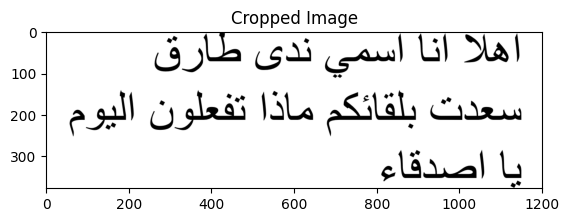

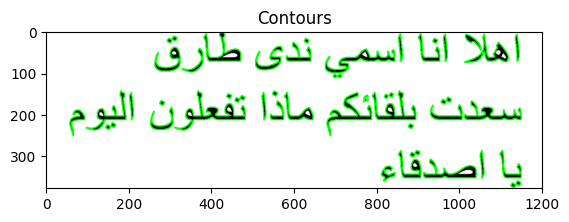

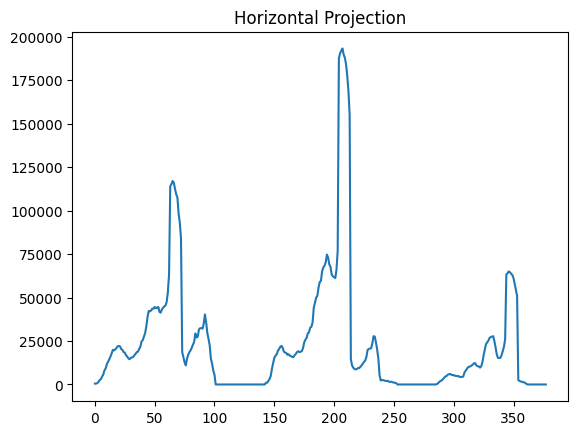

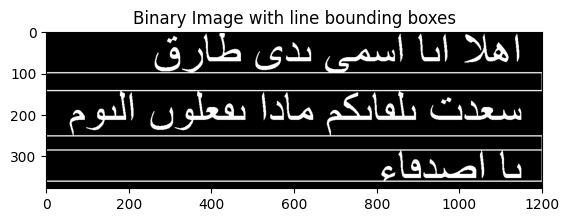

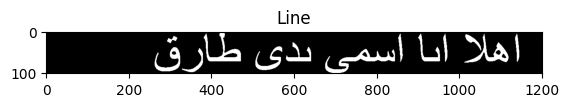

(101, 1201)


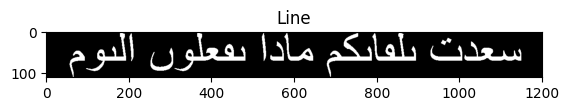

(110, 1201)


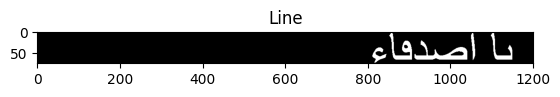

(76, 1201)


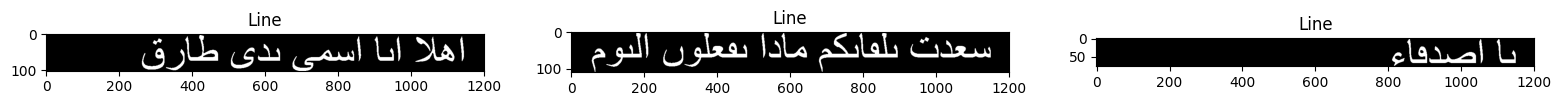

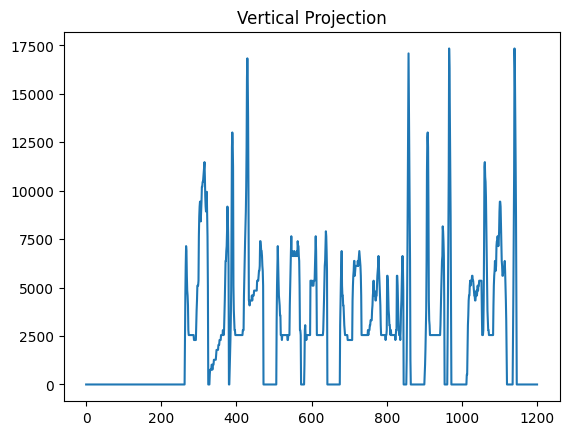

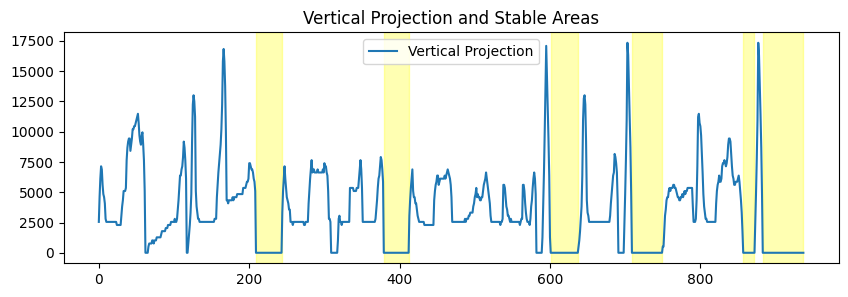

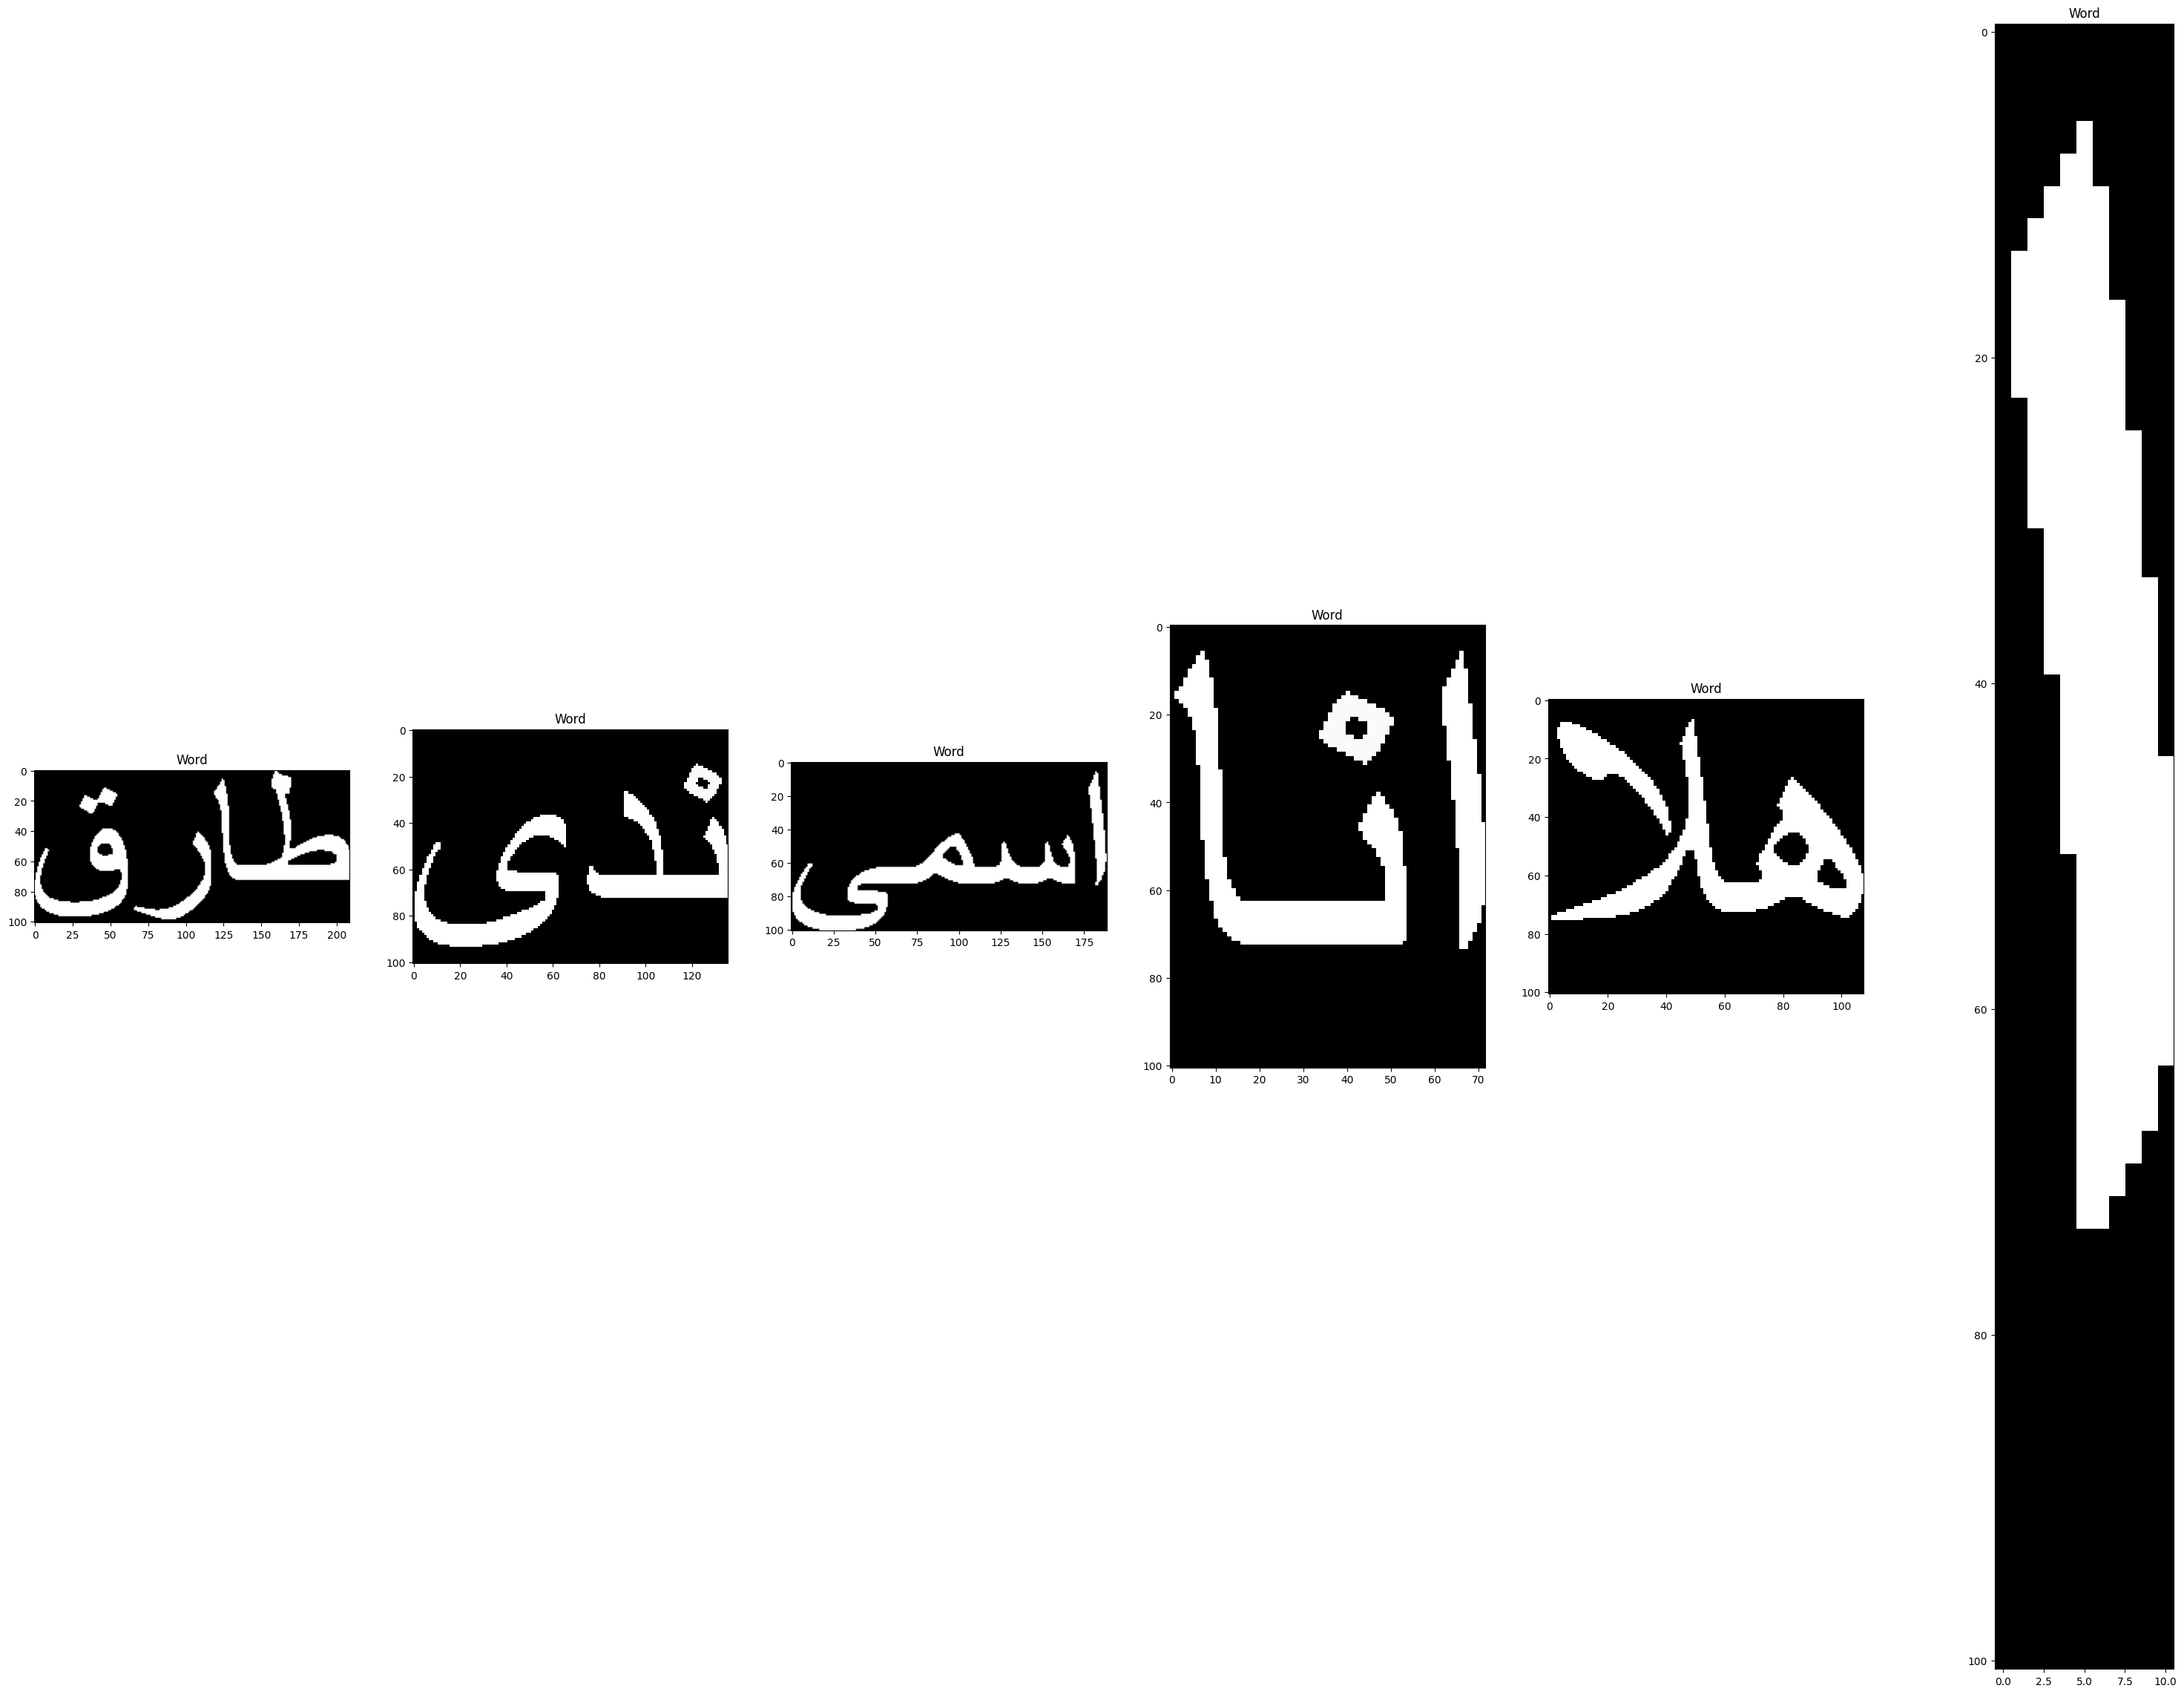

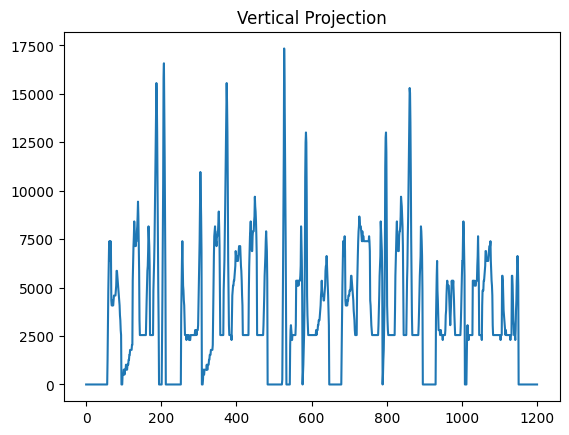

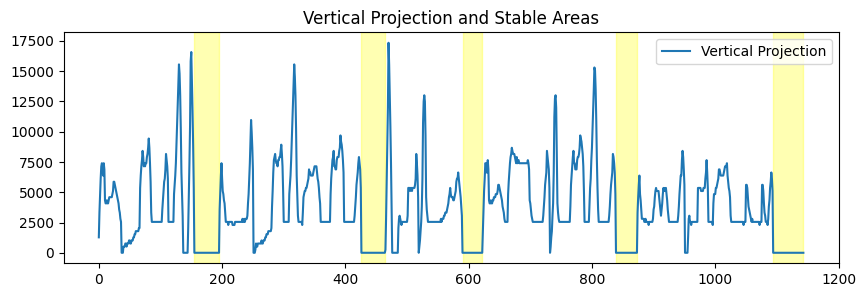

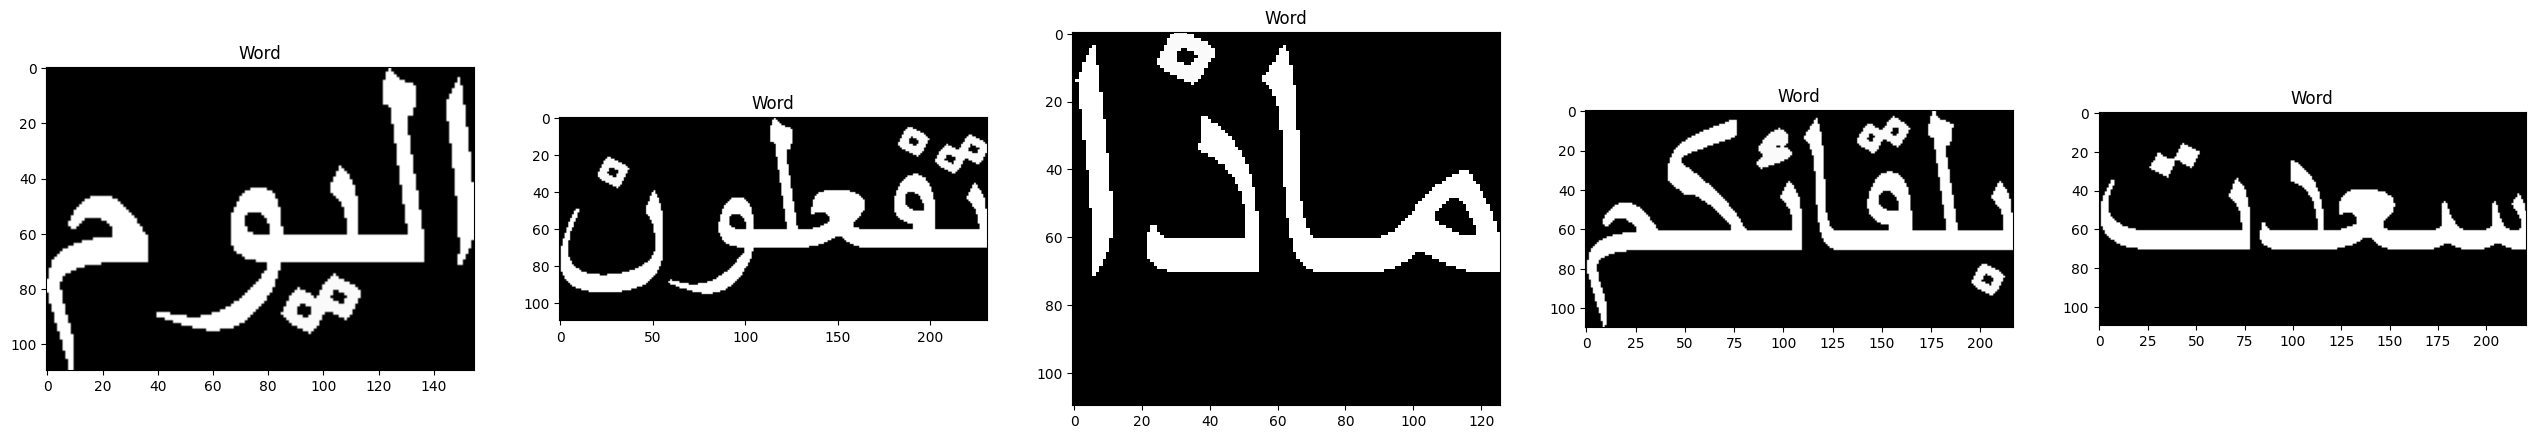

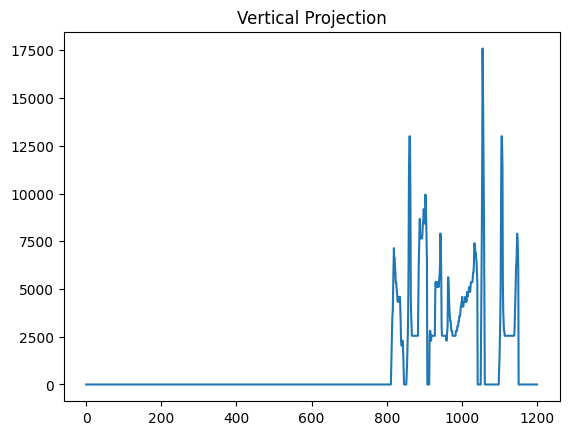

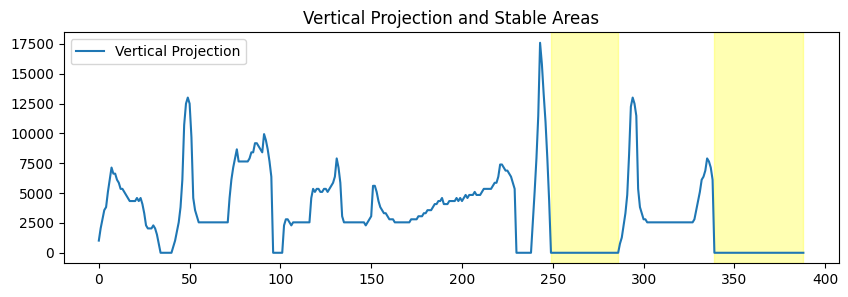

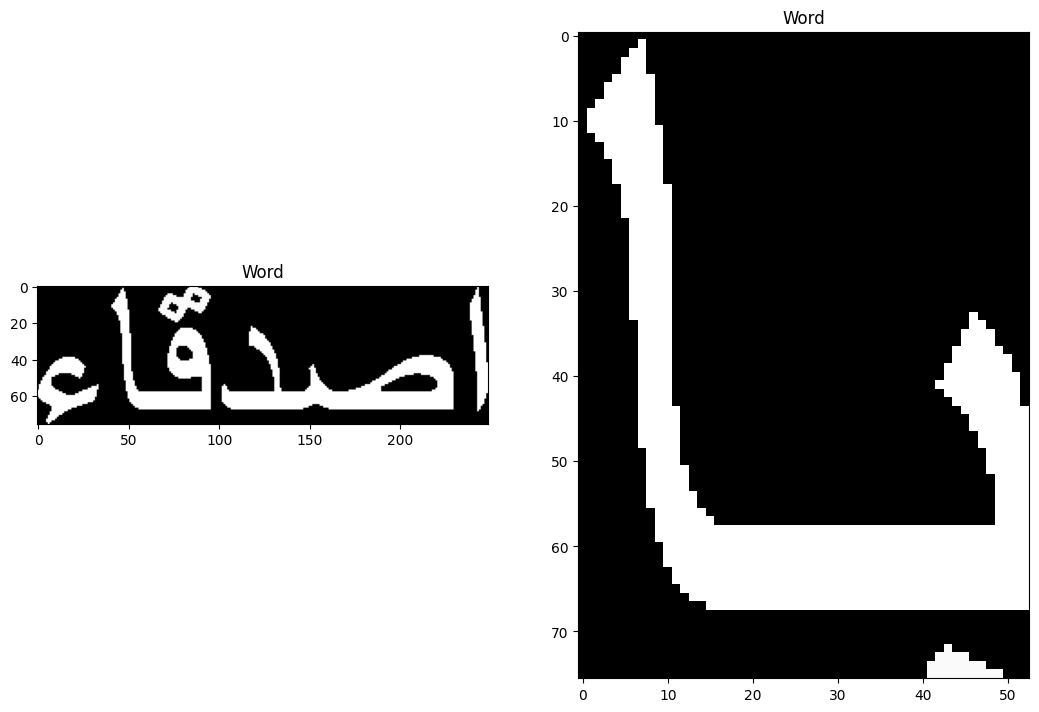

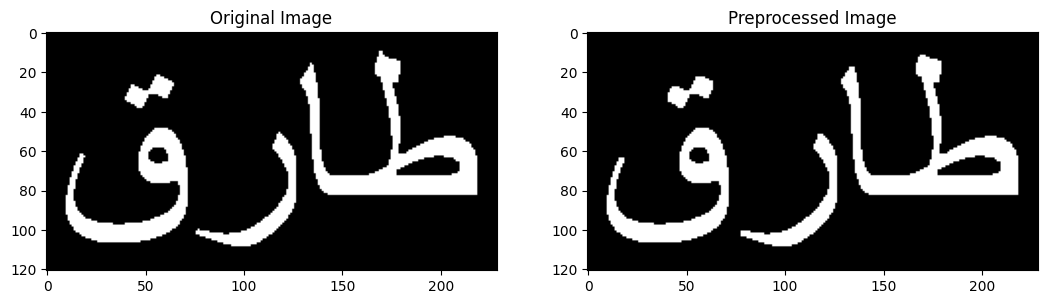

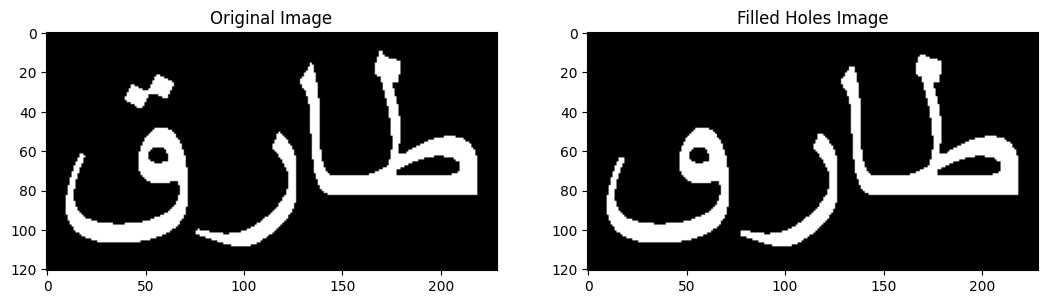

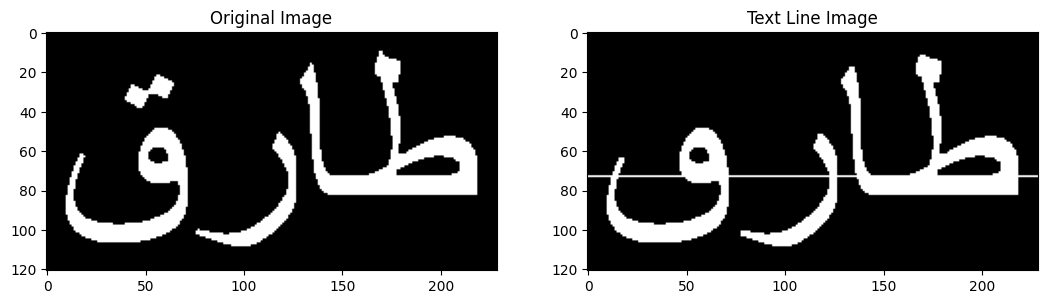

C:\Users\NADA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\NADA\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


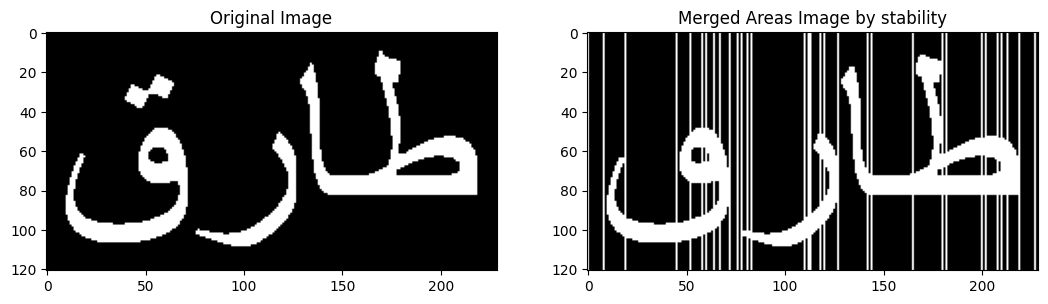

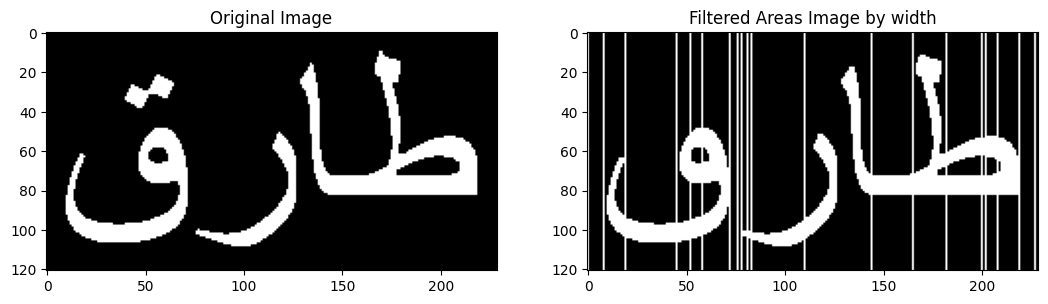

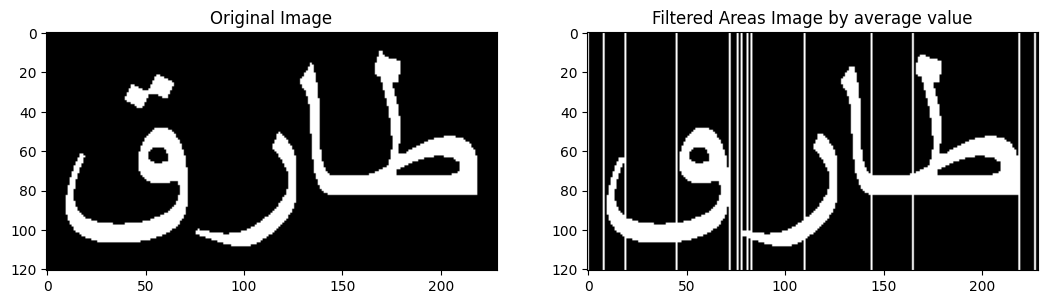

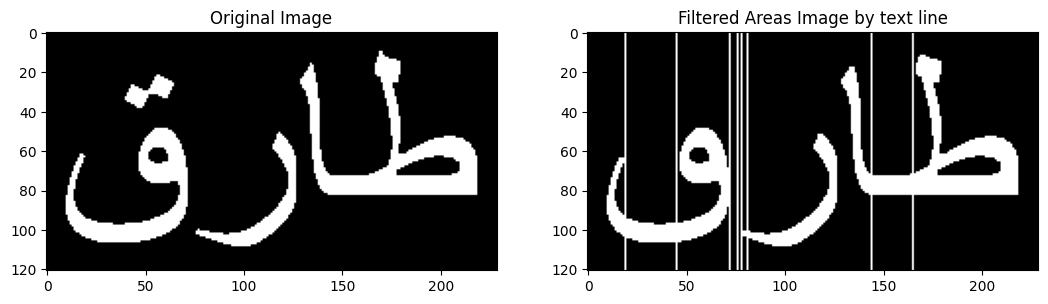

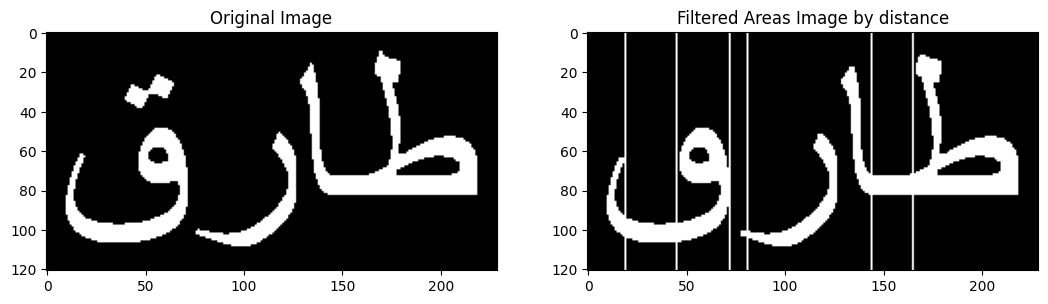

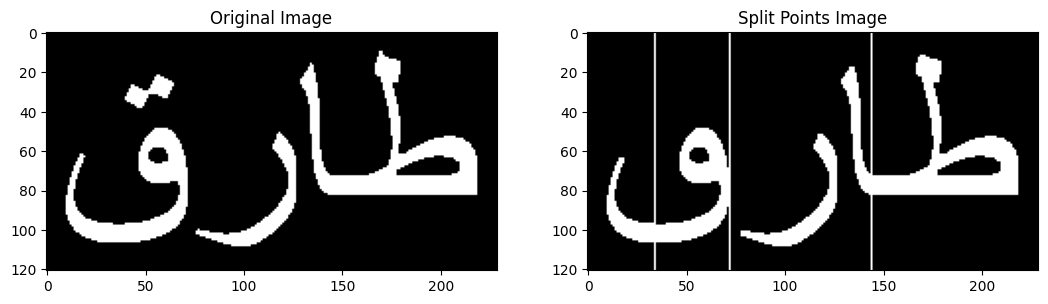

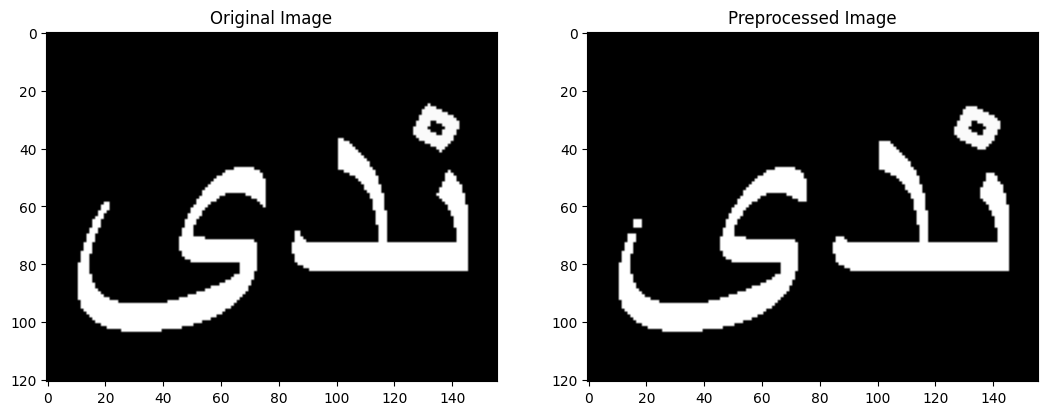

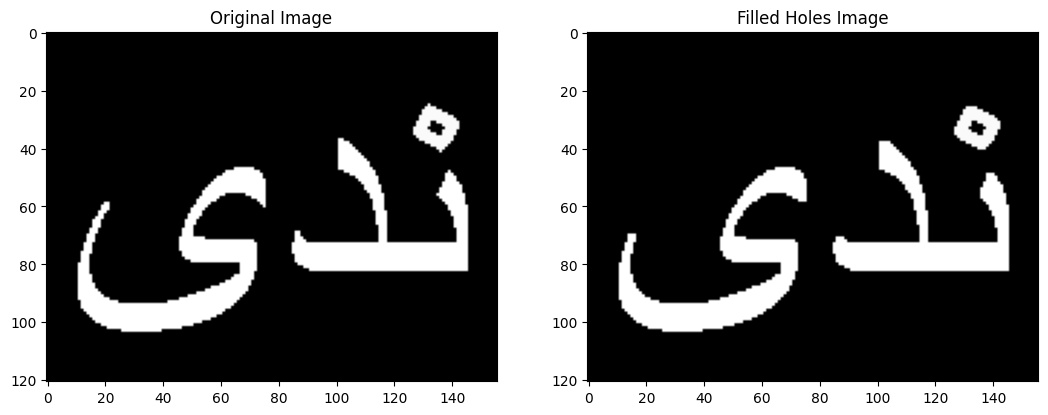

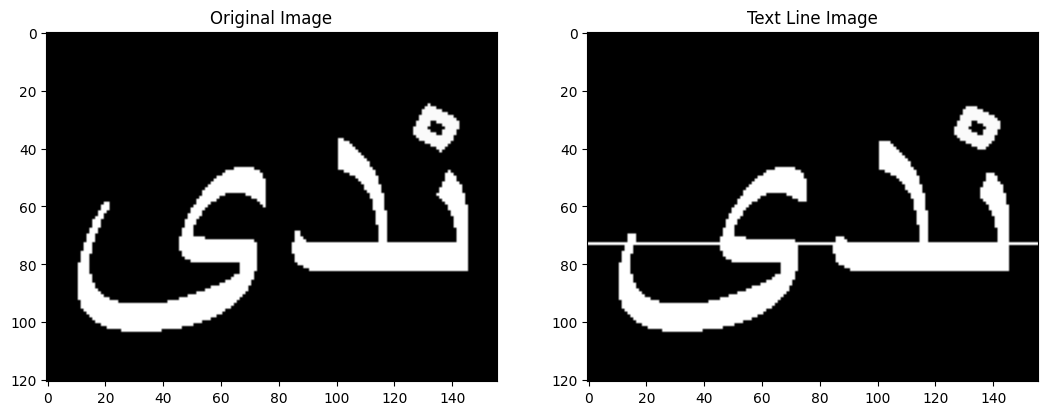

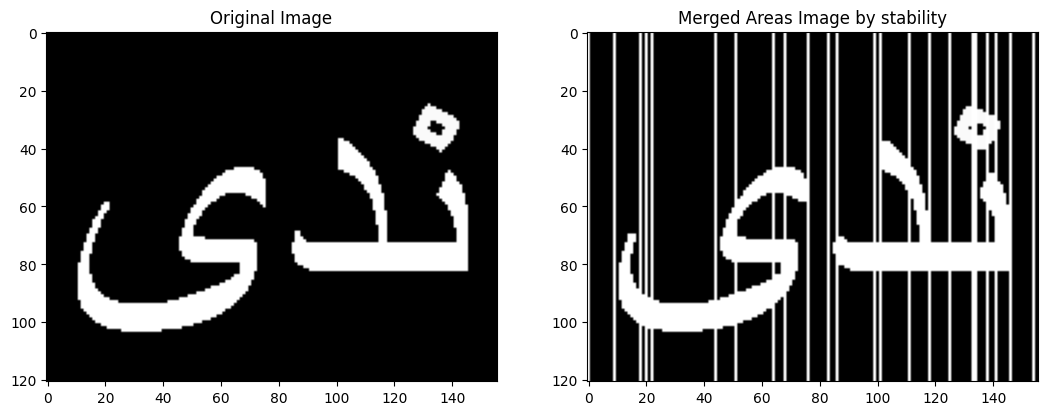

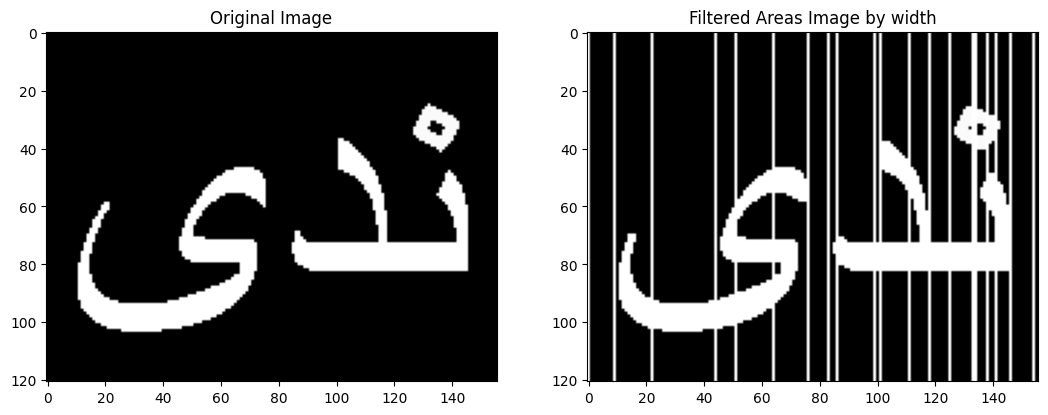

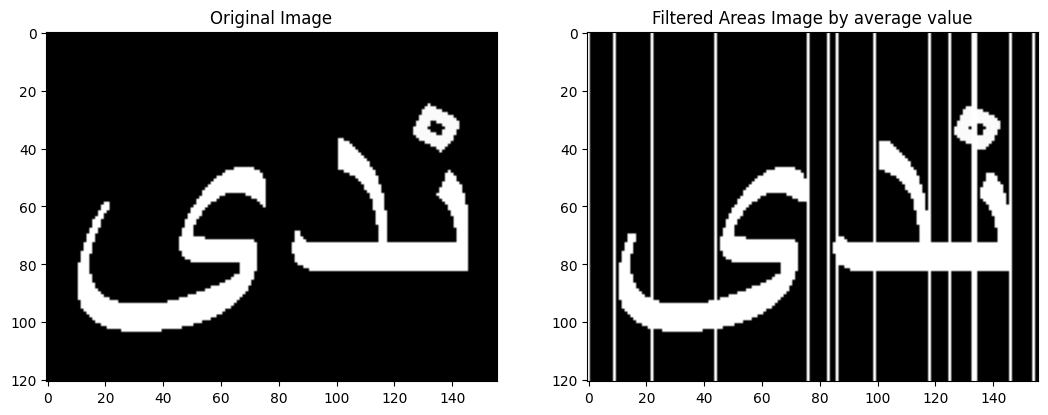

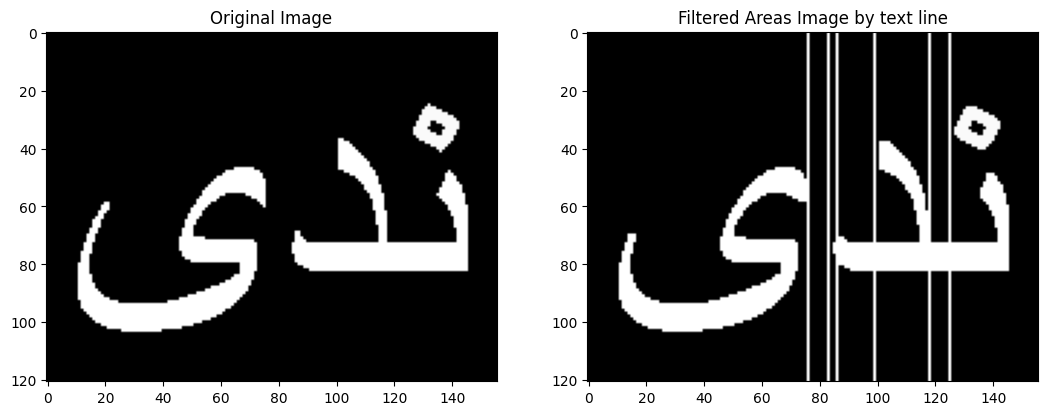

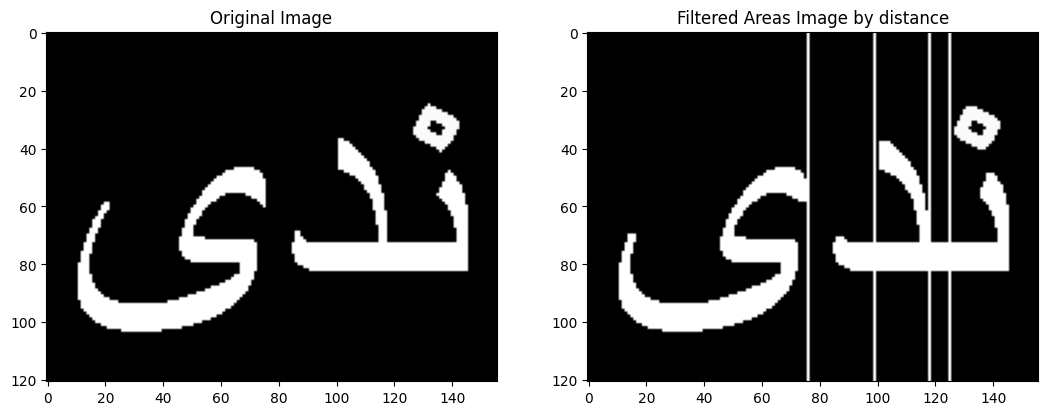

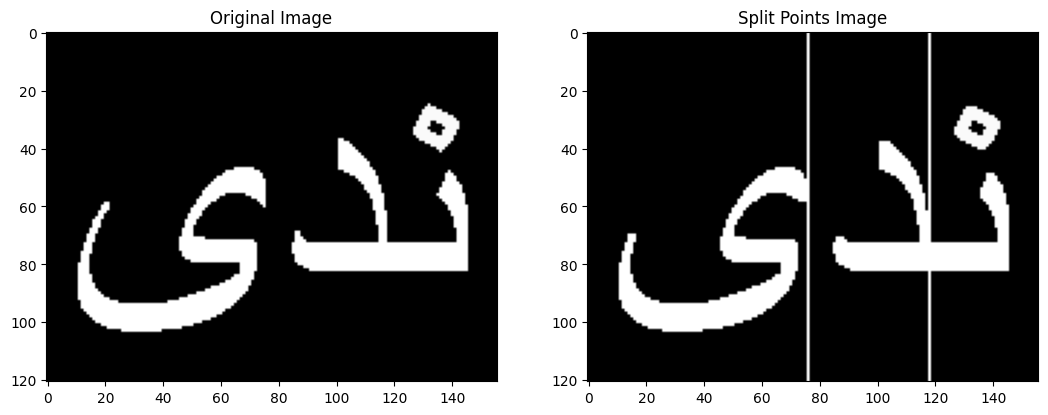

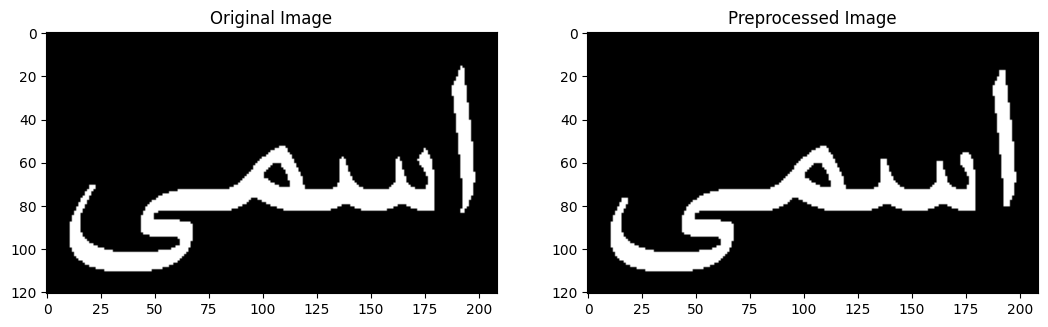

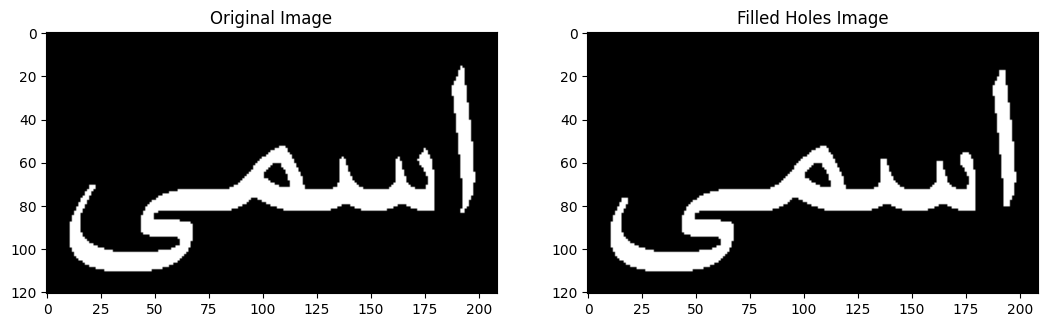

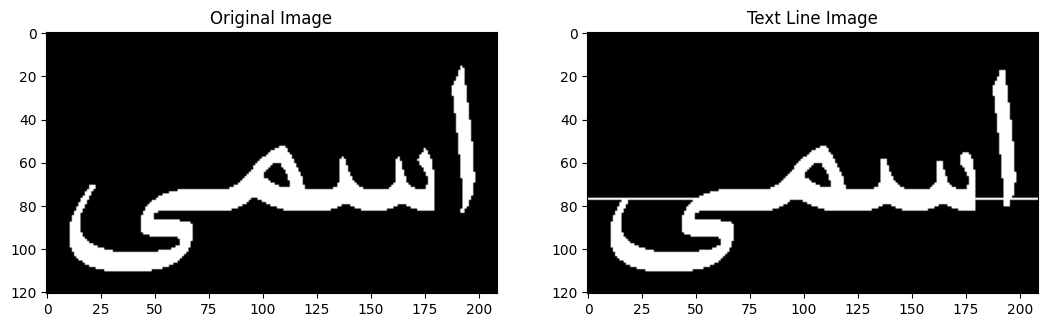

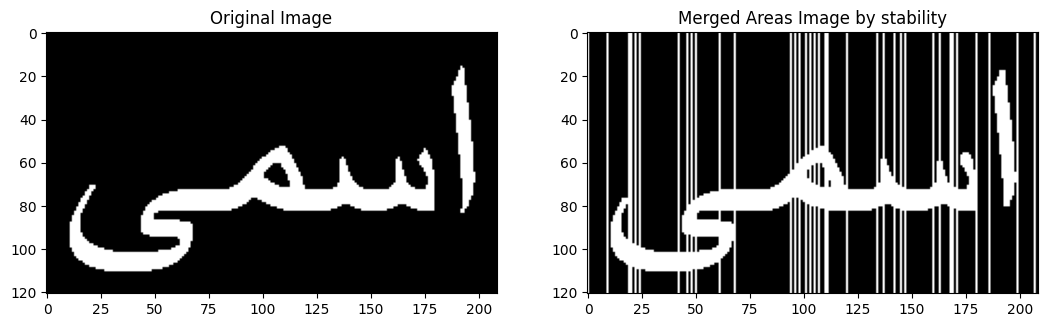

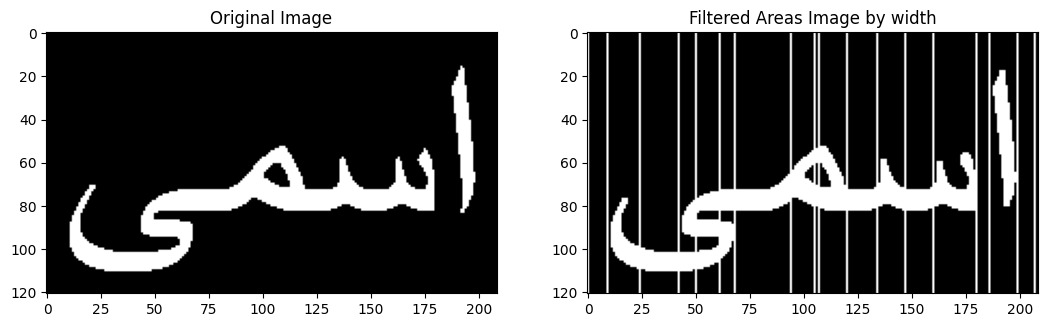

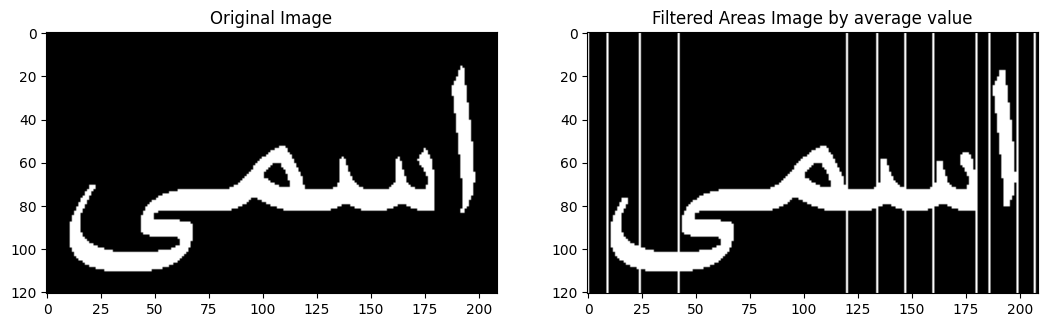

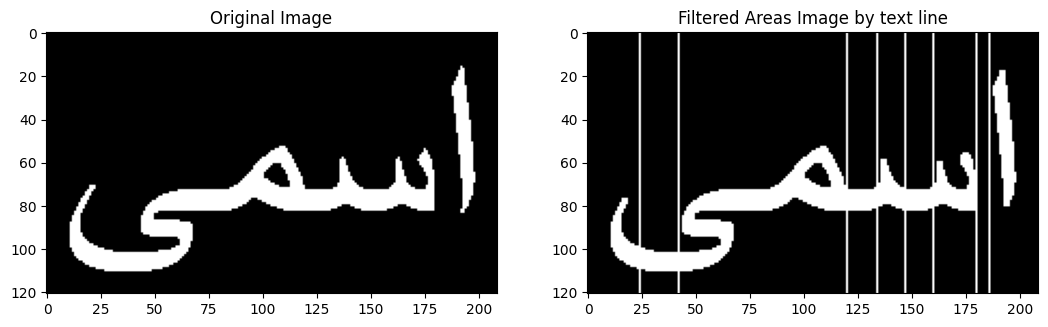

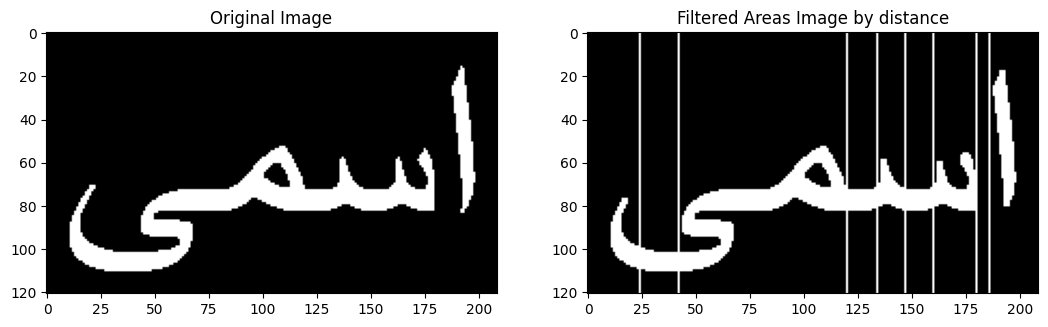

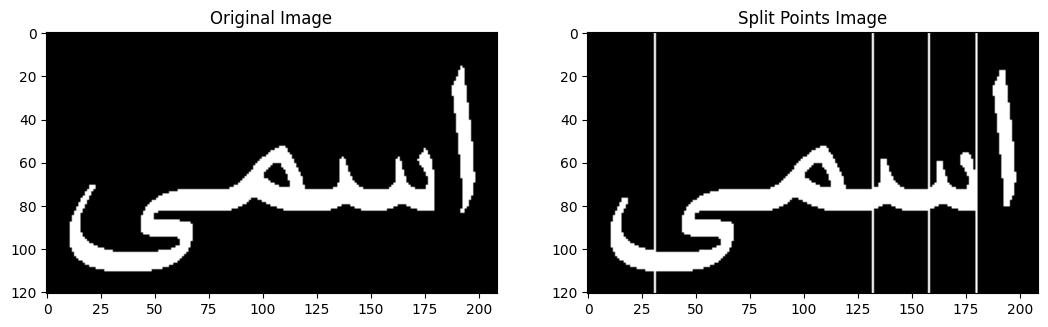

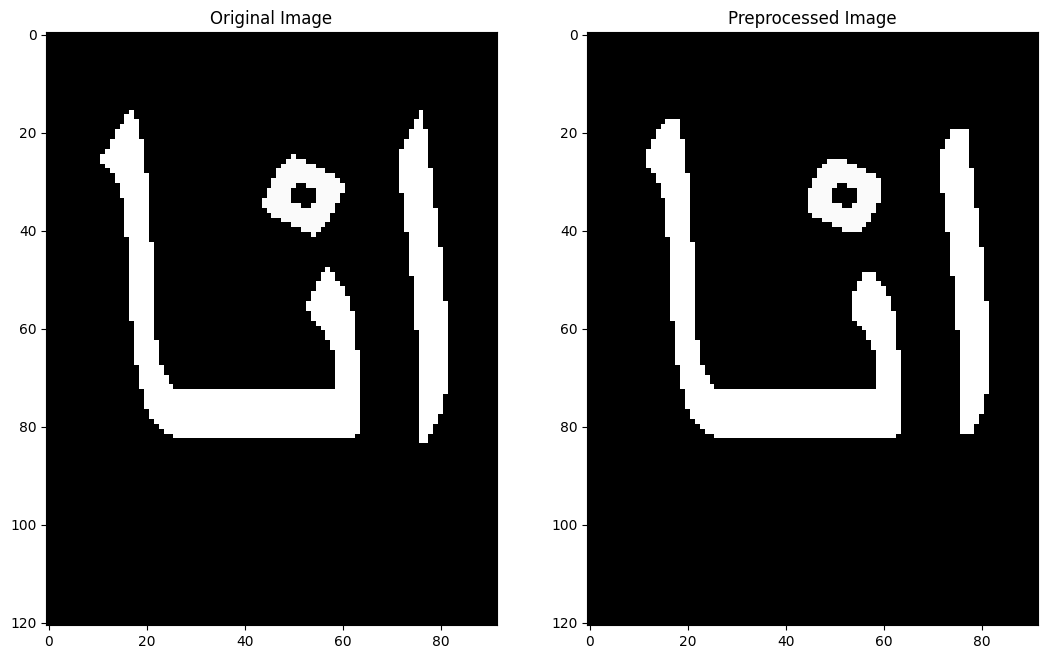

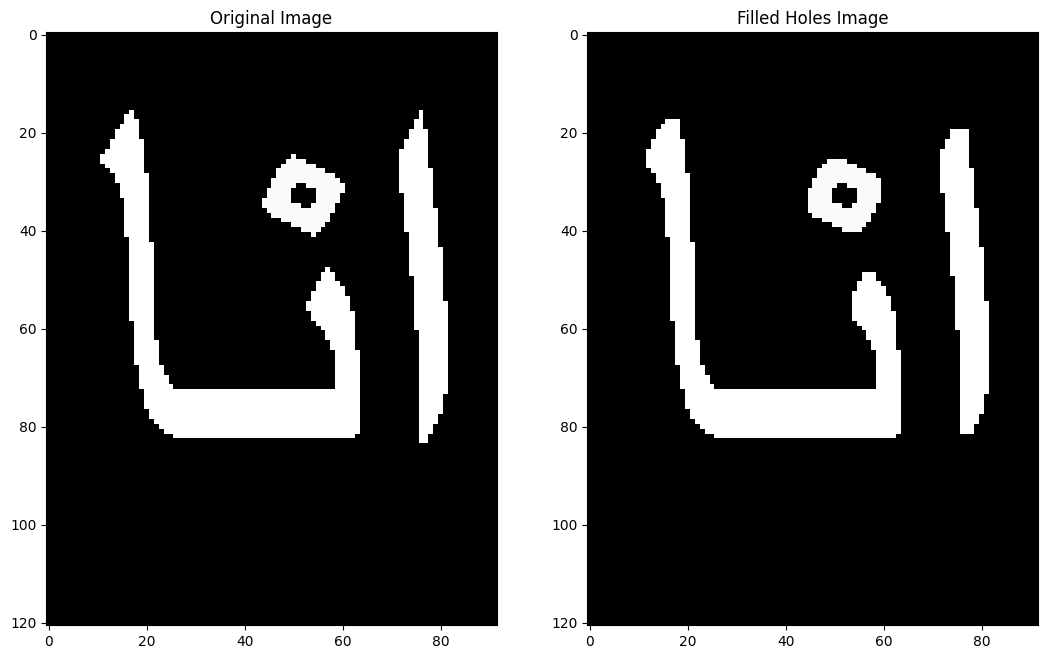

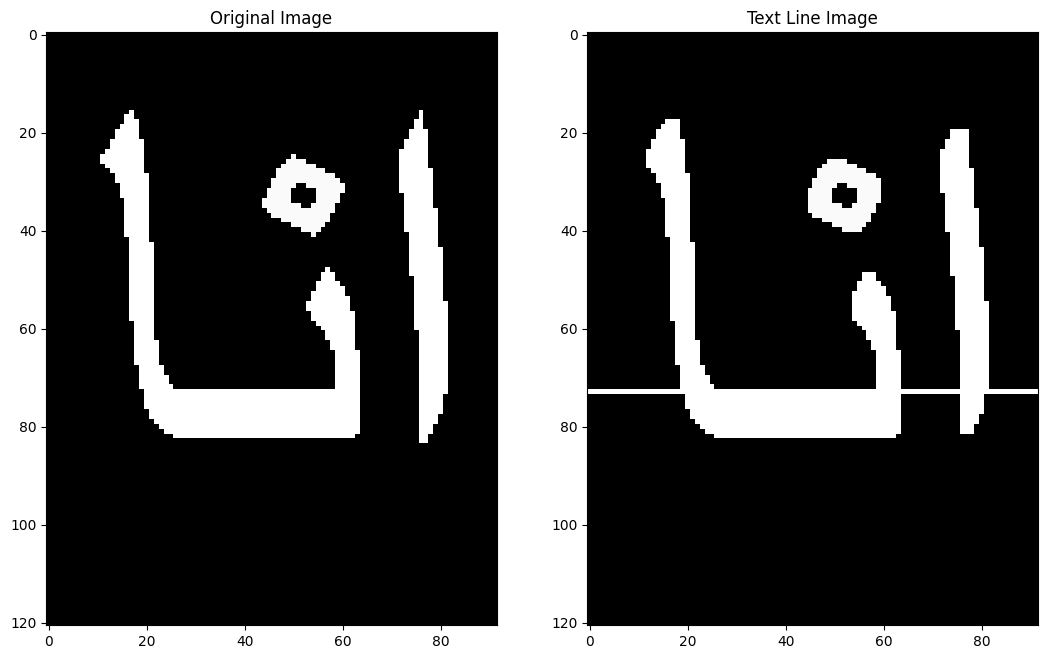

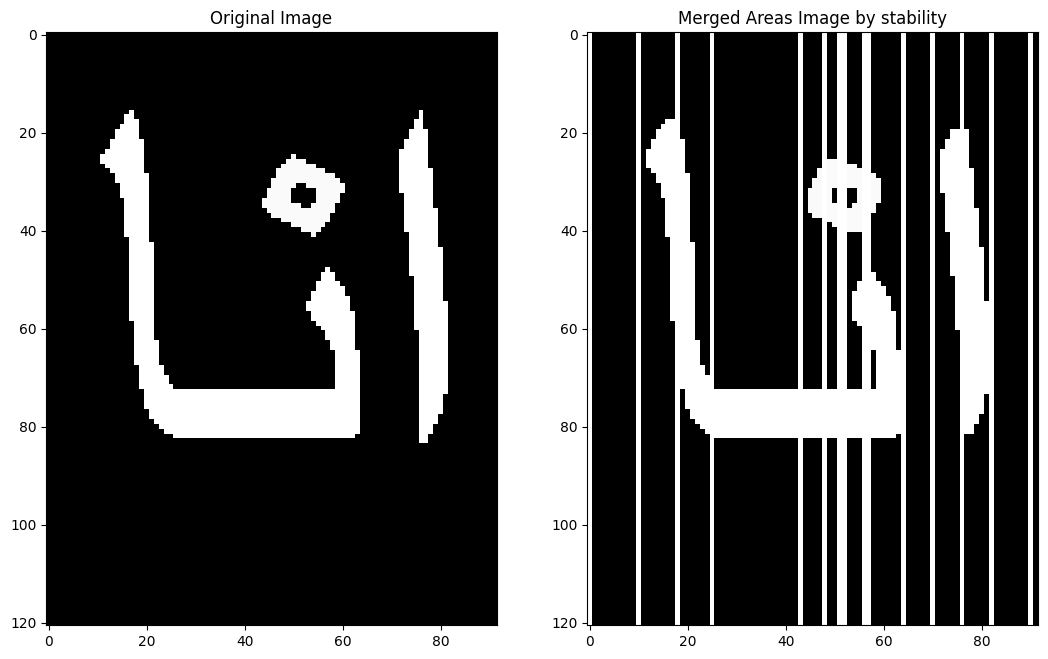

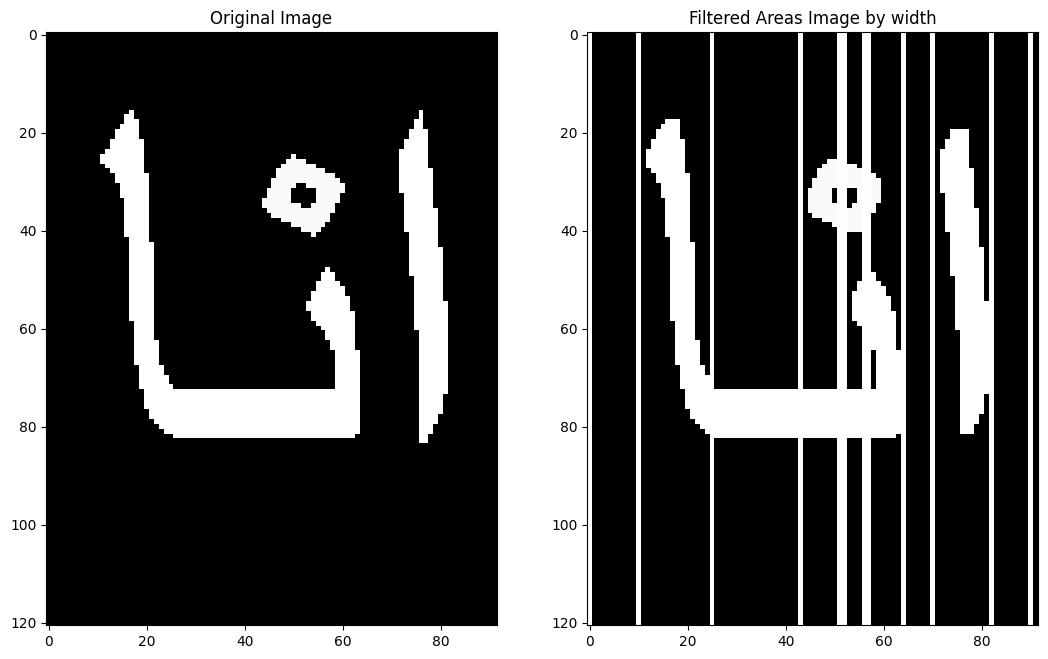

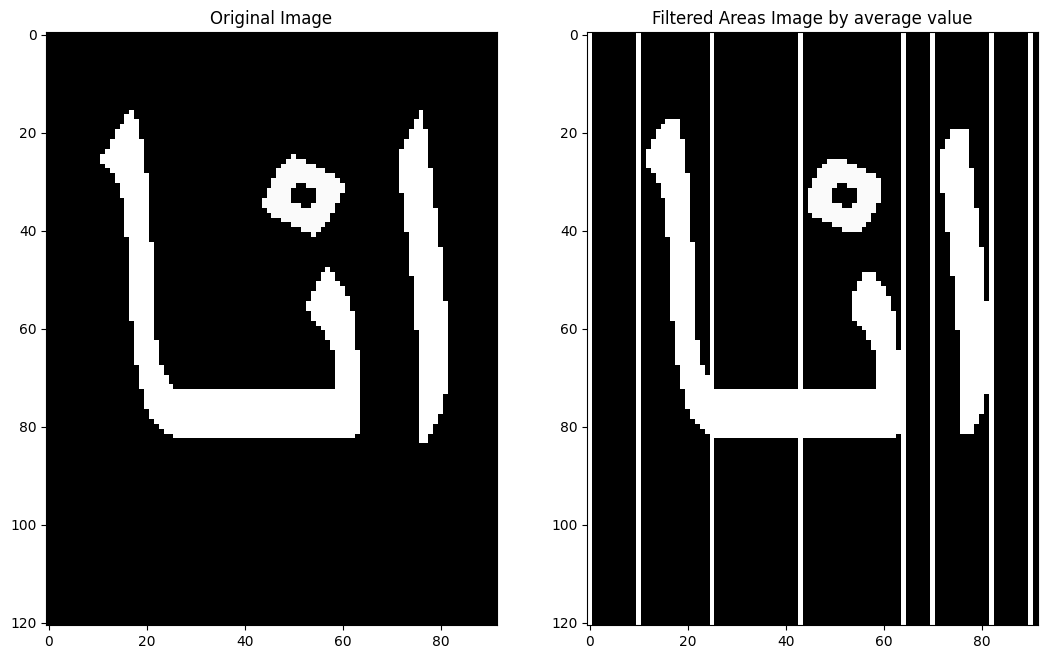

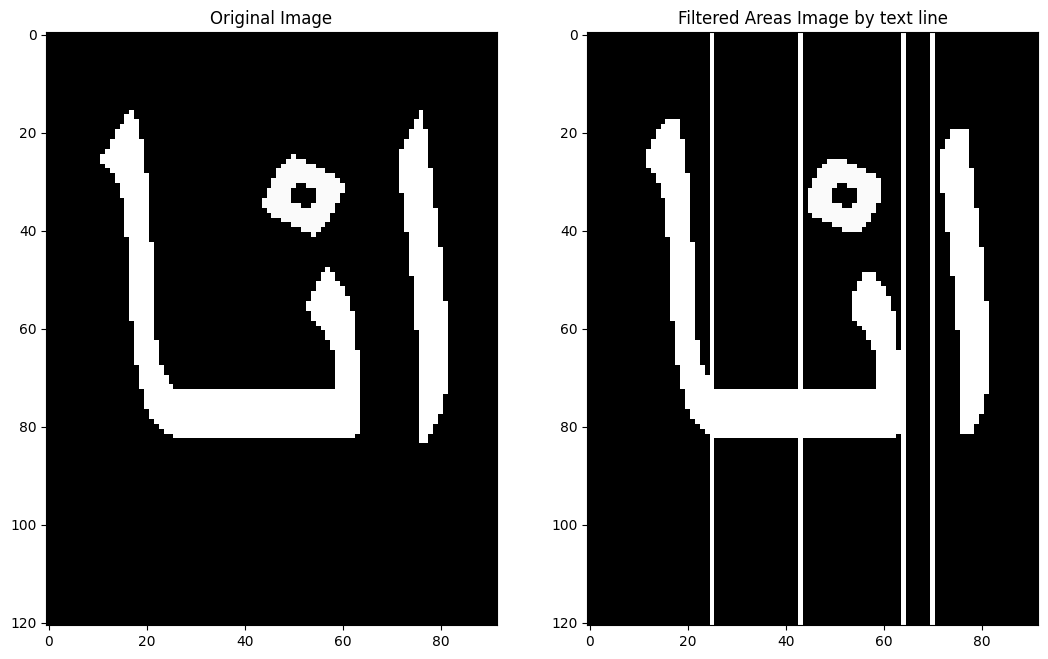

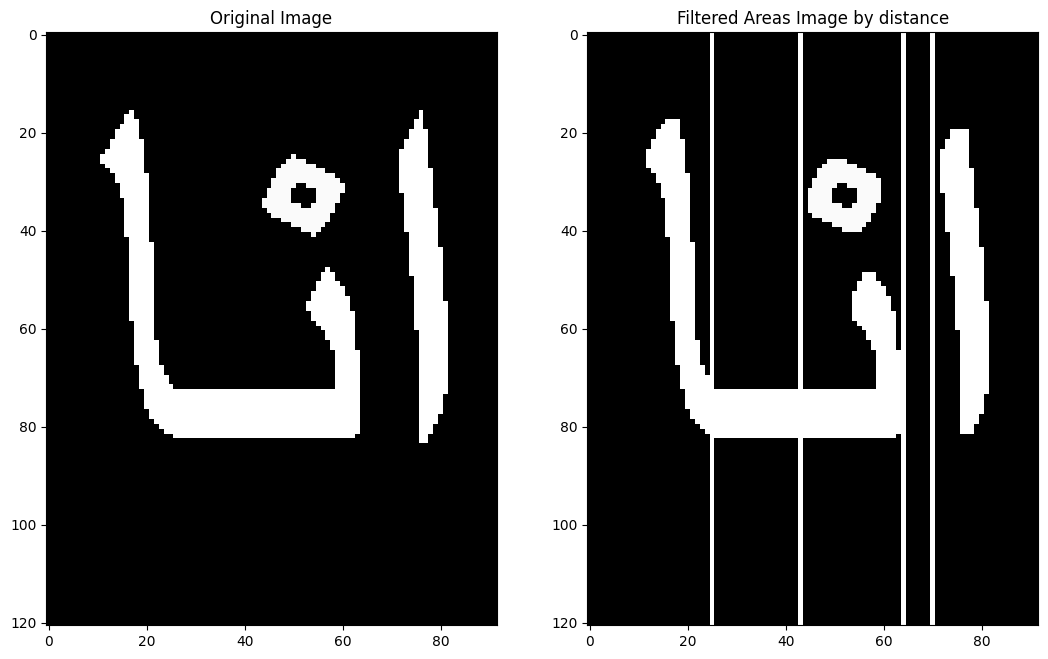

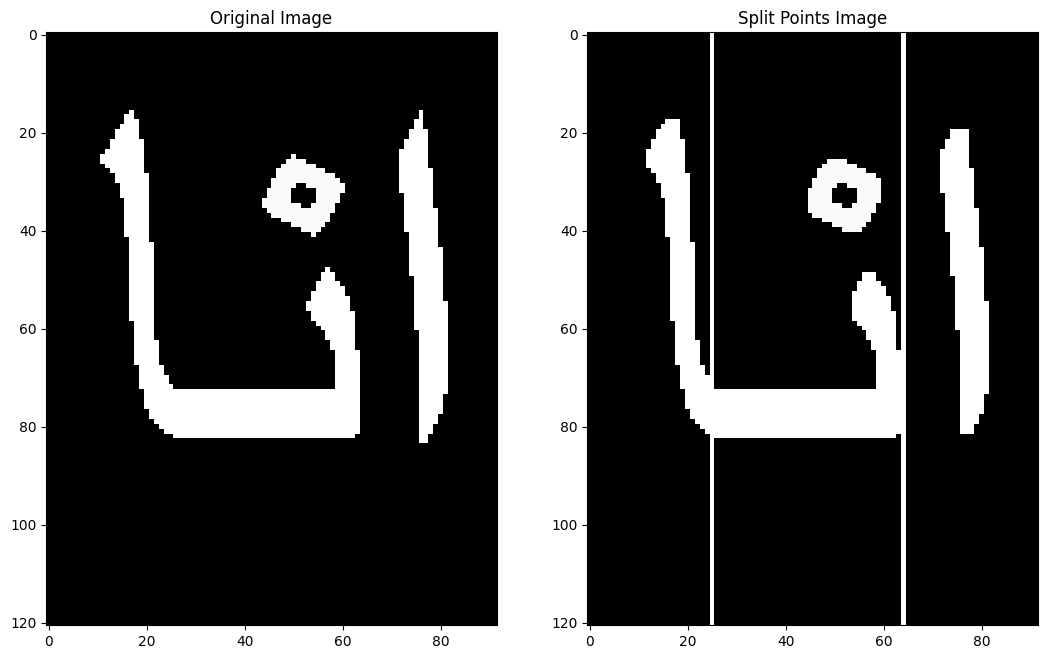

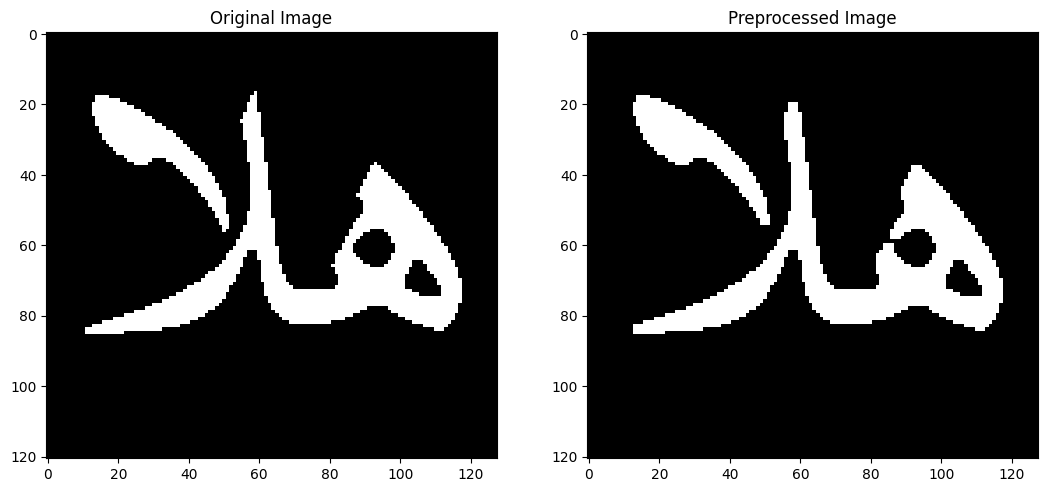

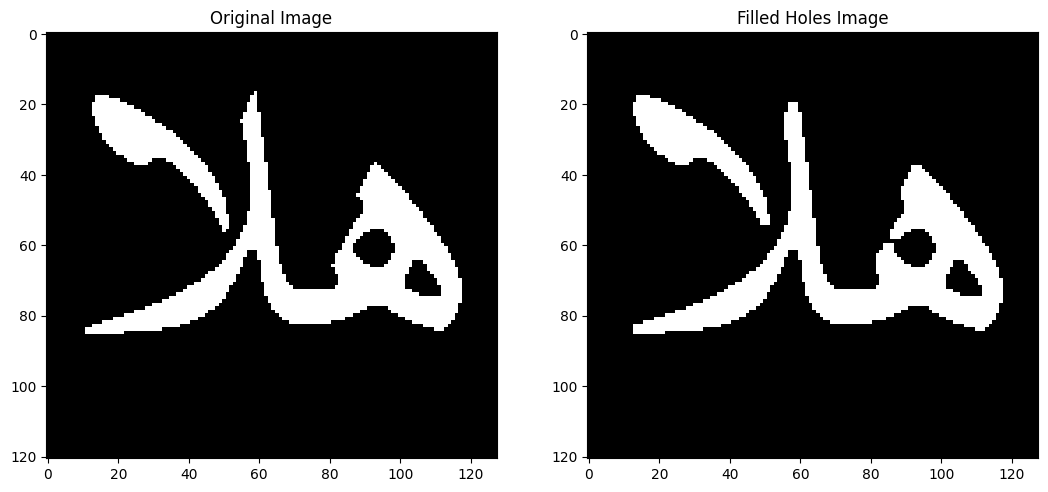

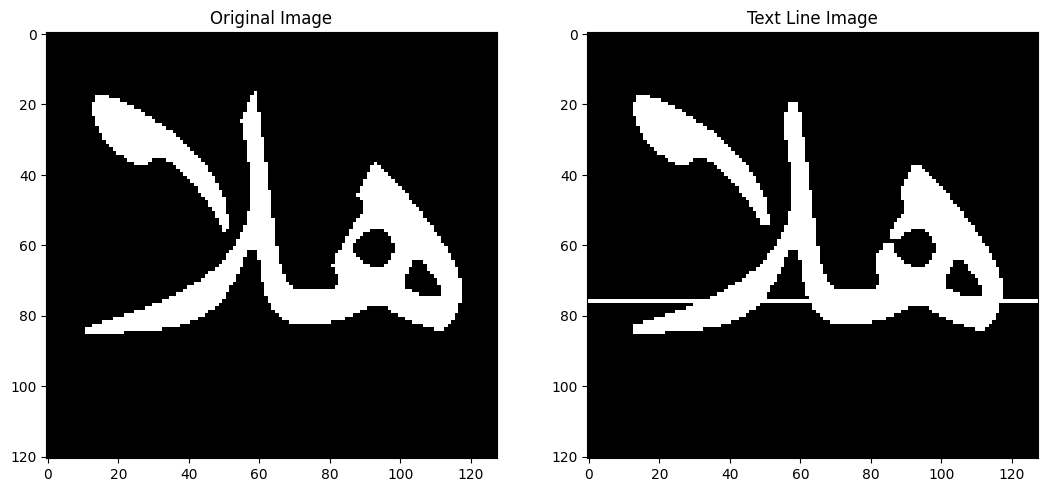

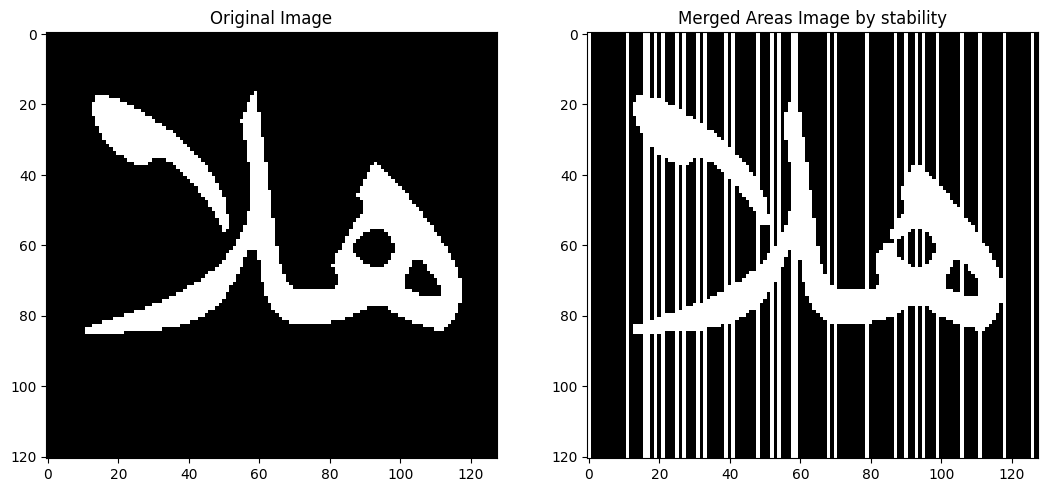

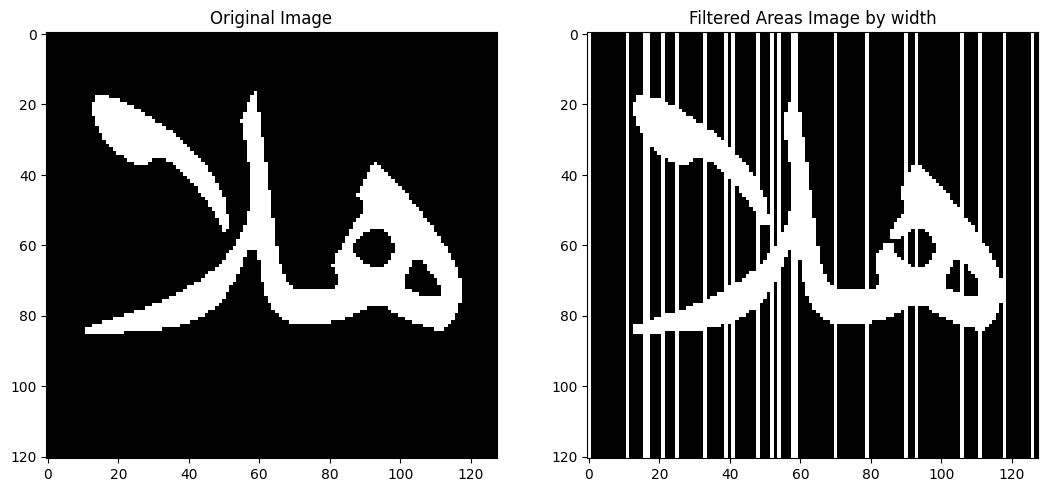

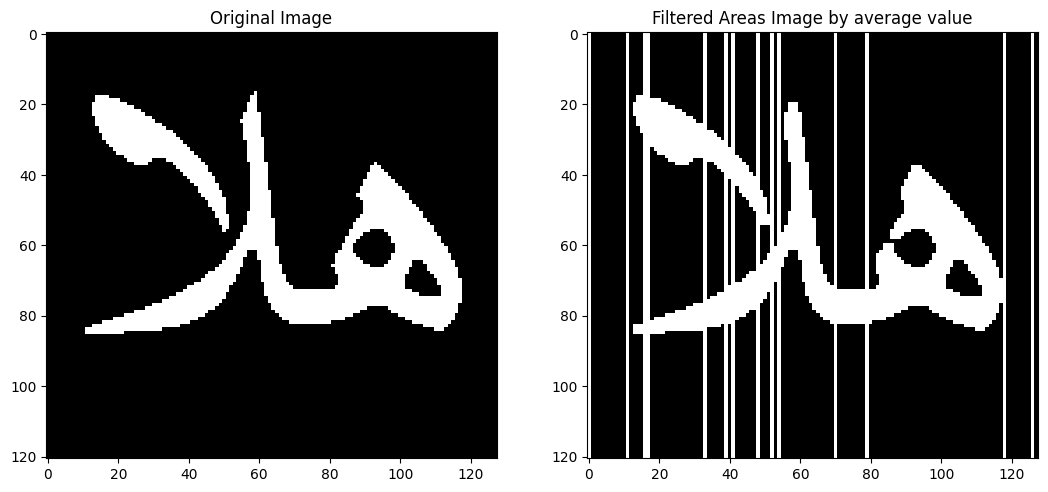

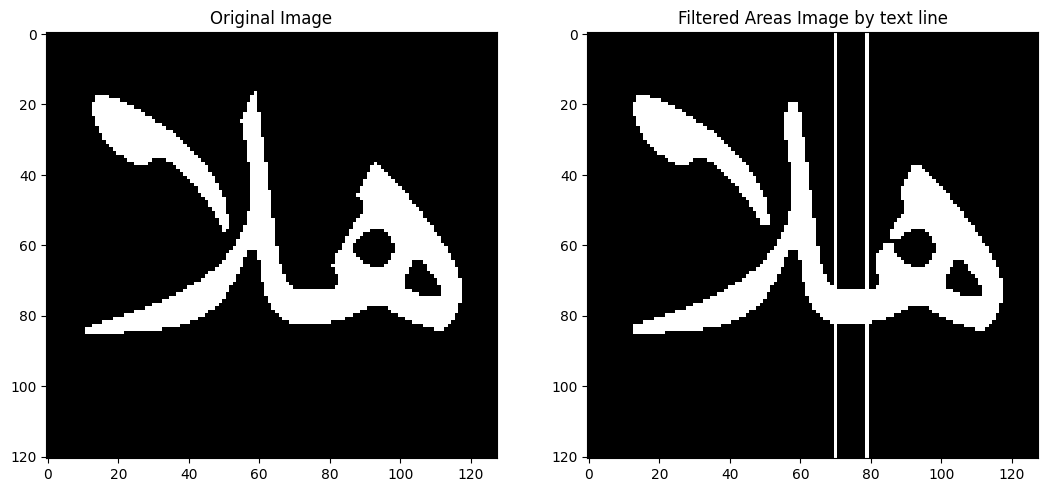

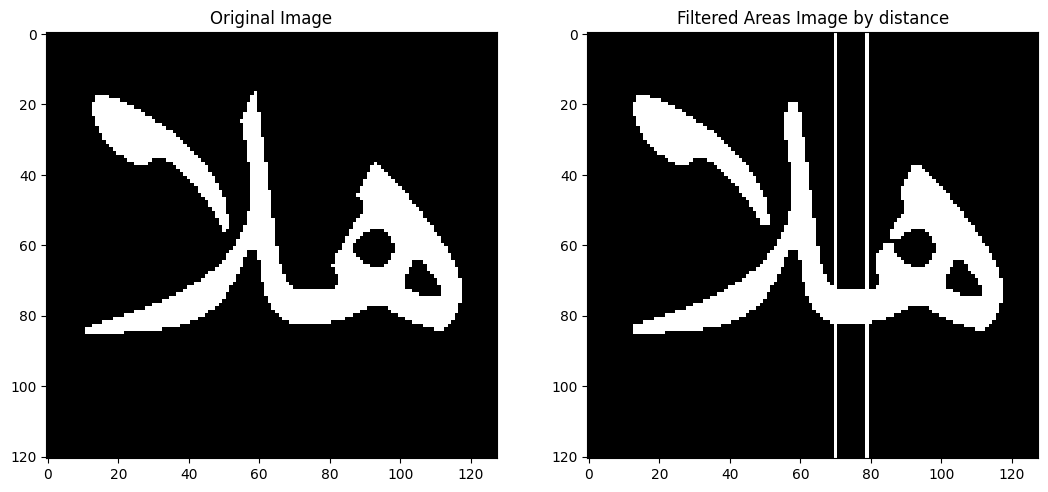

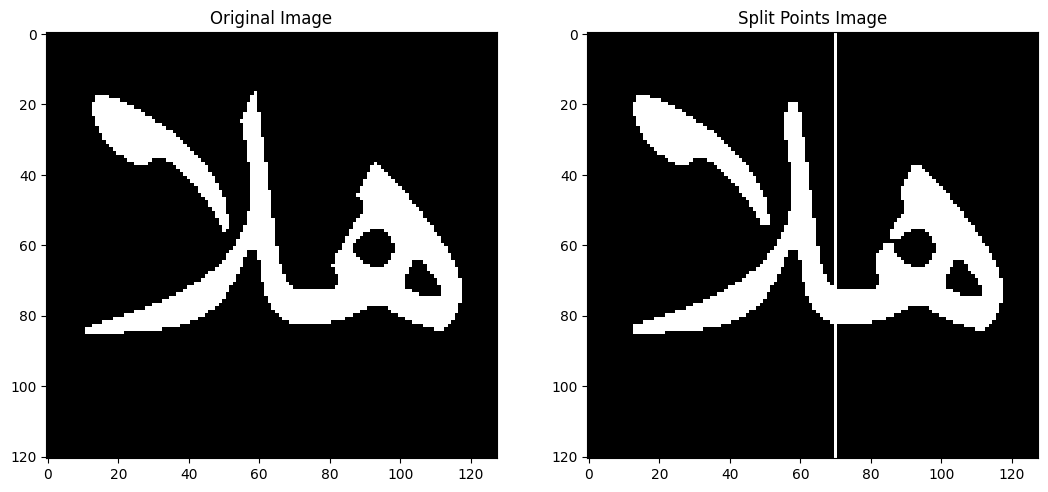

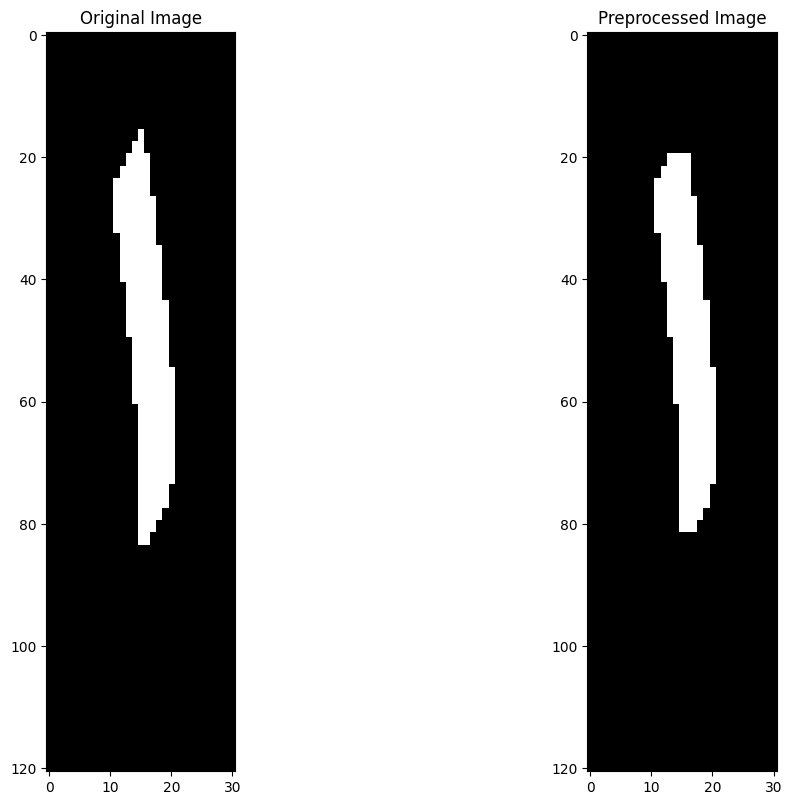

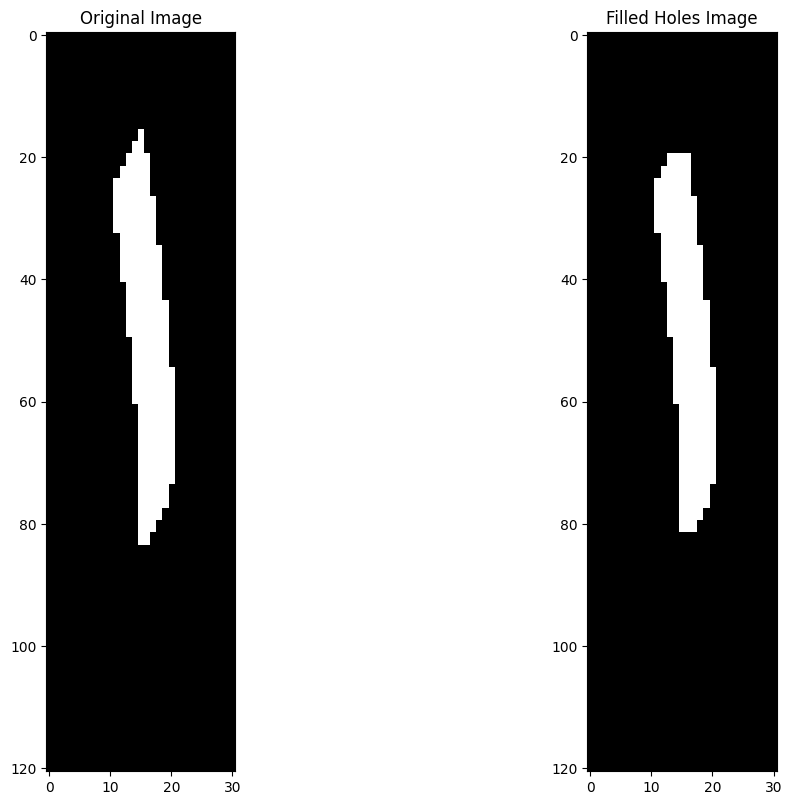

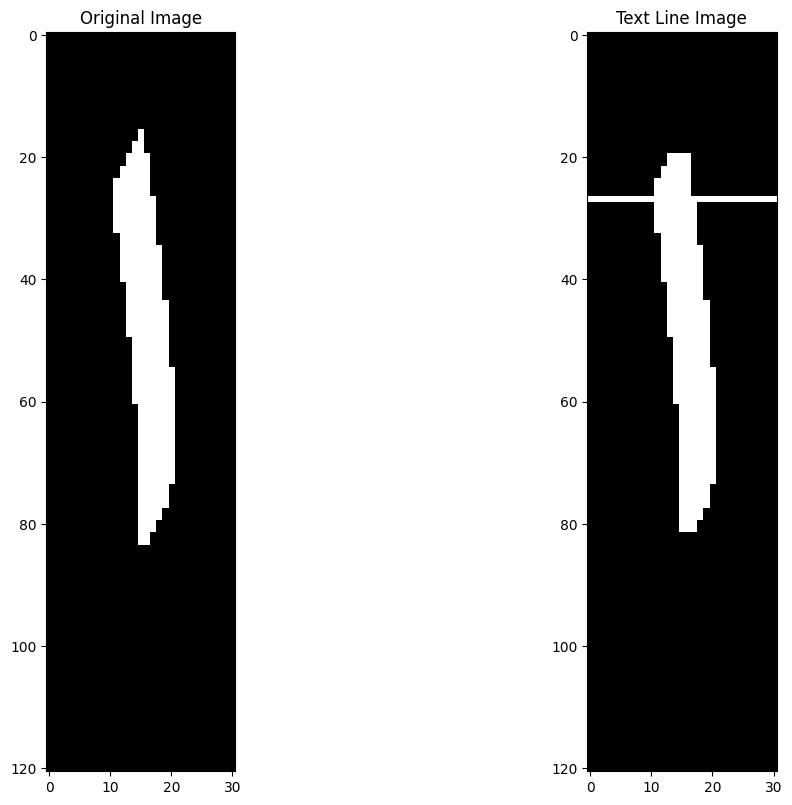

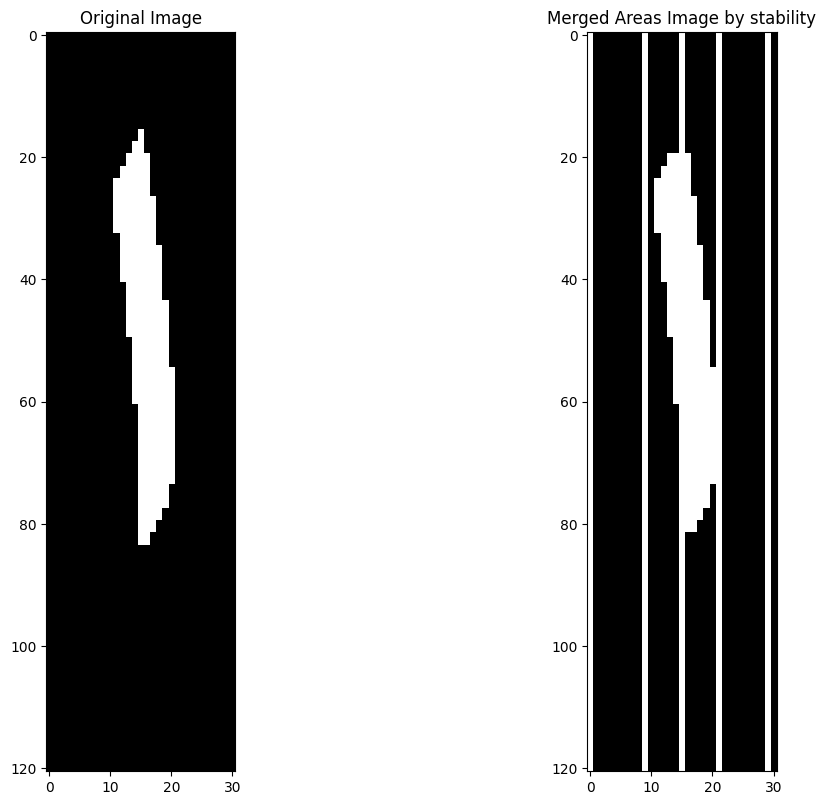

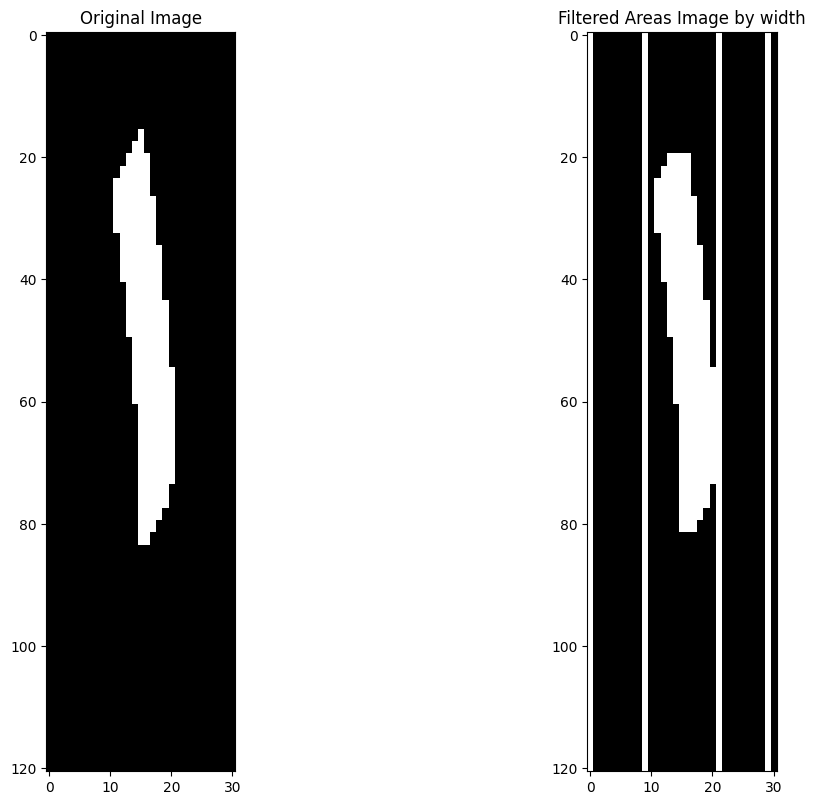

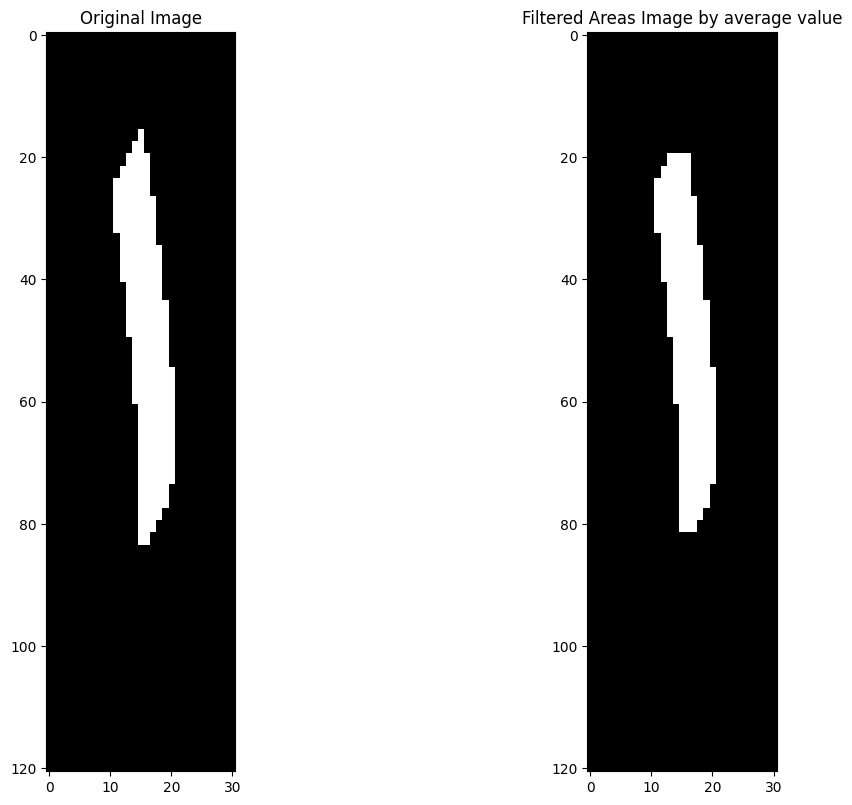

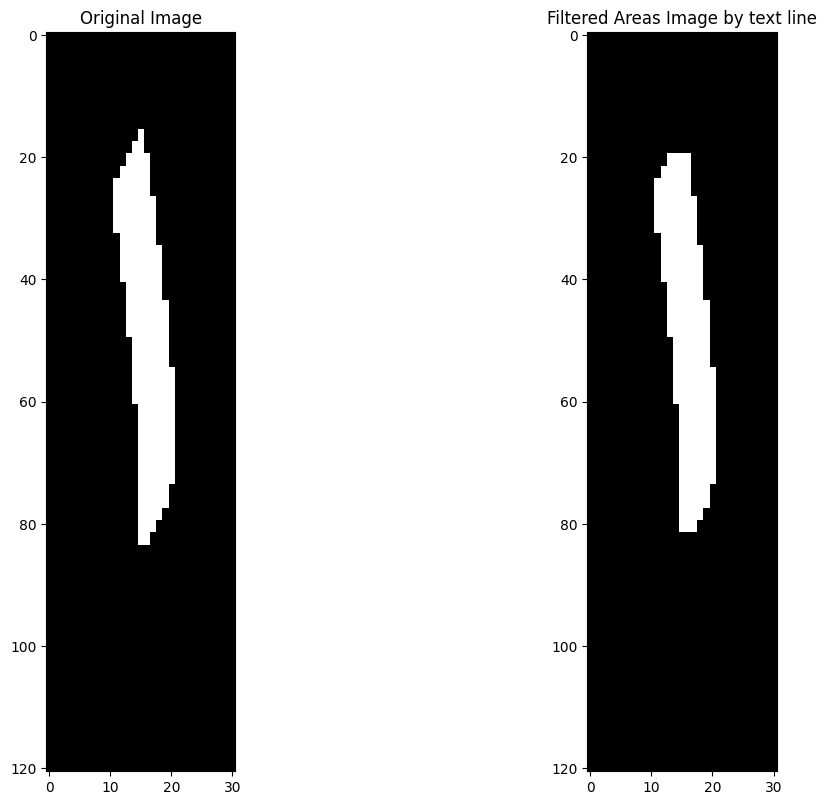

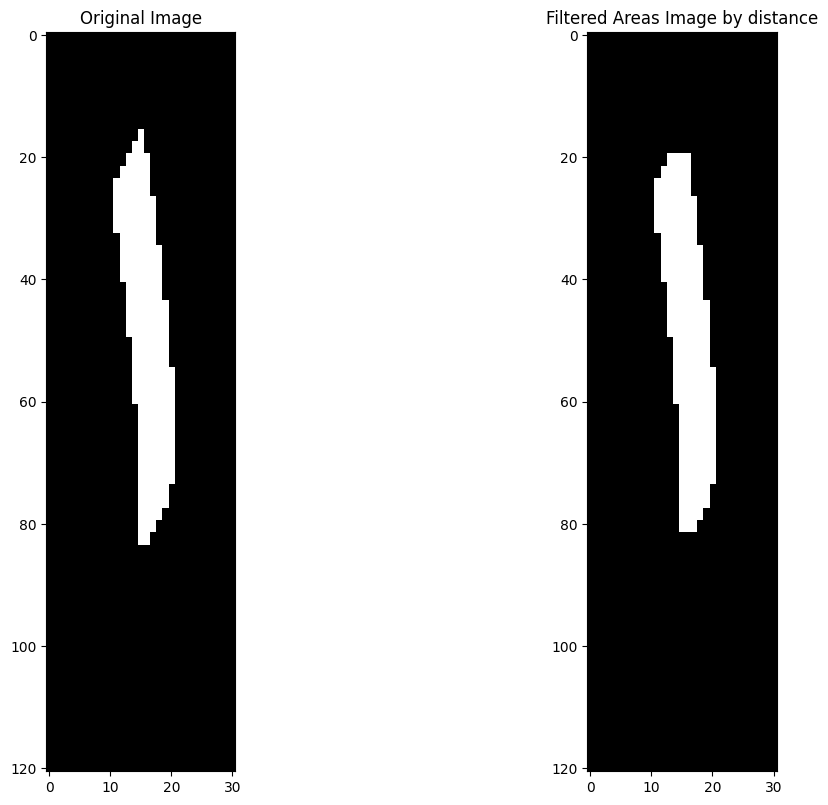

Prediction for letter 1: hamzaEnd
Prediction for letter 2: gaynMiddle
Prediction for letter 3: mimEnd
Prediction for letter 4: zaMiddle
ئغمظ
 
Prediction for letter 1: hamzaEnd
Prediction for letter 2: aynMiddle
Prediction for letter 3: haaBeginning
ئعه
 
Prediction for letter 1: haaBeginning
Prediction for letter 2: zaMiddle
Prediction for letter 3: aynMiddle
Prediction for letter 4: baEnd
Prediction for letter 5: alifBeginning
هظعبأ
 
Prediction for letter 1: haaMiddle
Prediction for letter 2: aynMiddle
Prediction for letter 3: alifBeginning
هعأ
 
Prediction for letter 1: gaynEnd
Prediction for letter 2: gaynMiddle
غغ
 
Prediction for letter 1: alifEnd
Prediction for letter 2: alifEnd
Prediction for letter 3: alifEnd
Prediction for letter 4: alifEnd
Prediction for letter 5: alifEnd
Prediction for letter 6: alifEnd
Prediction for letter 7: alifEnd
Prediction for letter 8: alifEnd
Prediction for letter 9: alifEnd
Prediction for letter 10: alifEnd
Prediction for letter 11: alifEnd
Predi

In [7]:


lines = Segmentation.segment_save_lines_words('D:/UNI/CCE_sem_8_LAST_YAY_^^/gp2/project/Alfarahifi_org/arabic-ocr/paragraphs_per_user/paragraphs_per_user/user001/com_paragraph.png')
#I have a list of tuples each tuple first entry contains an image of a line and the second entry is the segmented words of that line, i need to save this the folder Trial, ina  file hierarchy that goes line_i/word_j
for i, line in enumerate(lines):
    # Create directory for each line if it doesn't exist
    line_dir = f'Trial/computer_par/line_{i}'
    if not os.path.exists(line_dir):
        os.makedirs(line_dir)

    # Save line image
    #cv.imwrite(f'{line_dir}/line.png', line[0])

    # Save word images
    for j, word in enumerate(line[1]):
        cv.imwrite(f'{line_dir}/word_{j}.png', word)


files = getListOfFiles('Trial\computer_par\line_0')
for j,file in enumerate(files):
    letters = character_segmentation.segment_characters(file)

    if not os.path.exists(f'Trial/Characters/cmp/word{j}'):
        os.makedirs(f'Trial/Characters/cmp/word{j}')

    for i, word in enumerate(letters):
        file_path = f'Trial/Characters/cmp/word{j}/char_{i}.png'
        cv.imwrite(file_path, word)

directory_path = 'Trial/Characters/cmp'
list_words = os.listdir(directory_path)


for word_file in list_words:
    path = os.path.join(directory_path, word_file)
    Run(path)

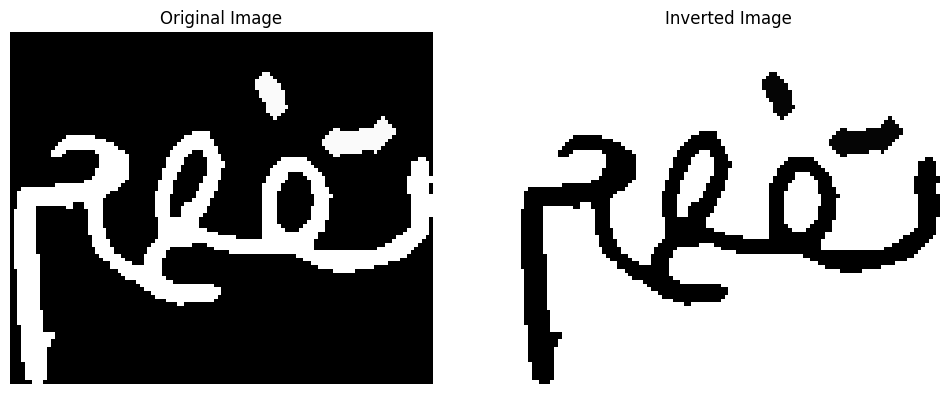

In [8]:
import pytesseract
from PIL import Image, ImageOps
import matplotlib.pyplot as plt

# Load the image
image_path = 'Trial/line_0/word_1.png'
image = Image.open(image_path)

# Invert the image
inverted_image = ImageOps.invert(image.convert('RGB'))

# Perform OCR on the inverted image
extracted_text = pytesseract.image_to_string(inverted_image, lang='ara')

# Print the extracted text
print(extracted_text)

# Display the original and inverted images
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Original image
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[0].axis('off')

# Inverted image
ax[1].imshow(inverted_image)
ax[1].set_title('Inverted Image')
ax[1].axis('off')

plt.show()
